##**Modèles GARCH en Python**
+ *4 heures*
+ *15 Vidéos*
+ *54 Exercices*
+ *6 168 participants*
+ *3 950 XP*


###**Description du cours**

+ ***La volatilité est un concept essentiel en finance, c'est pourquoi les modèles GARCH en Python sont un choix populaire pour prévoir les changements de variance, en particulier lorsque vous travaillez avec des données de séries chronologiques qui dépendent du temps. Ce cours vous montrera comment et quand implémenter les modèles GARCH, comment spécifier les hypothèses du modèle et comment faire des prévisions de volatilité et évaluer les performances du modèle. En utilisant des données du monde réel, y compris les cours historiques des actions Tesla, vous acquerrez une expérience pratique de la façon de mieux quantifier les risques de portefeuille, grâce aux calculs de la valeur à risque, de la covariance et du bêta des actions. Vous appliquerez également ce que vous avez appris à un large éventail d'actifs, y compris les actions, les indices, les crypto-monnaies et les devises, vous préparant à utiliser les modèles GARCH.***

####**1) Fondamentaux du modèle GARCH**

+ ***Que sont les modèles GARCH, à quoi servent-ils et comment pouvez-vous les implémenter en Python ? Après avoir terminé ce premier chapitre, vous serez en mesure de répondre en toute confiance à toutes ces questions.***


|OBJECTIFS|
|--------|
Pourquoi avons-nous besoin de modèles GARCH
Comprendre la volatilité
Observer le regroupement de la volatilité
Calculer la volatilité
Que sont ARCH et GARCH
Revoir les bases du modèle GARCH
Simuler les séries ARCH et GARCH
Observer l'impact des paramètres du modèle
Comment implémenter des modèles GARCH en Python
Consulter la documentation "arch"
Implémenter un modèle GARCH de base
Faire des prévisions avec les modèles GARCH

####**2) Configuration du modèle GARCH**

+ ***Un modèle GARCH normal n'est pas représentatif des données financières réelles, dont les distributions présentent fréquemment des queues épaisses, une asymétrie et des chocs asymétriques. Dans ce chapitre, vous apprendrez à définir de meilleurs modèles GARCH avec des hypothèses plus réalistes. Vous apprendrez également à faire des prévisions de volatilité plus sophistiquées avec des approches de fenêtre glissante.***



|OBJECTIFS|
|--------|
Hypothèses de répartition
Queues grasses et asymétrie
Répartition graphique des résidus standardisés
Ajuster un GARCH avec une distribution en t asymétrique
Spécifications moyennes du modèle
Vérifier les hypothèses moyennes du modèle
Effet du modèle moyen sur les prévisions de volatilité
Modèles de volatilité pour chocs asymétriques
Modélisation des réponses asymétriques de la volatilité
Adapter les modèles GARCH à la crypto-monnaie
Comparez GJR-GARCH avec EGARCH
Prévision de la fenêtre glissante GARCH
Pourquoi utiliser la fenêtre de prévision glissante ?
Prévision de fenêtre mobile fixe
Comparez les résultats des prévisions

####**3) Évaluation des performances du modèle**

+ ***Ce chapitre vous présente le principe KISS de la modélisation de la science des données. Vous apprendrez à utiliser les valeurs p et les statistiques t pour simplifier la configuration du modèle, à utiliser le tracé ACF, le test Ljung-Box pour vérifier les hypothèses du modèle et à utiliser les critères de probabilité et d'information pour la sélection du modèle.***


|OBJECTIFS|
|--------|
Test de signification des paramètres du modèle
Reste simple stupide
Simplifier le modèle avec des p-values
Simplifier le modèle avec des statistiques t
Validation des hypothèses du modèle GARCH
Détecter les autocorrélations
Tracé ACF
Test de Ljung-Box
Mesures de la qualité de l'ajustement
Qualité de base de l'ajustement
Choisissez un gagnant en fonction de la log-vraisemblance
Choisissez un gagnant en fonction de l'AIC/BIC
Backtesting du modèle GARCH
Les bases du backtesting
Backtesting avec MAE, MSE


####**4) GARCH en action**

+ ***Dans ce dernier chapitre, vous apprendrez à appliquer les modèles GARCH que vous avez appris précédemment à des scénarios pratiques du monde financier. Vous développerez vos compétences à mesure que vous vous familiariserez avec la VaR dans la gestion des risques, la covariance dynamique dans l'allocation d'actifs et le bêta dynamique dans la gestion de portefeuille.***

|OBJECTIFS|
|--------|
VaR dans la gestion des risques financiers
Notion de VaR
Calculer la VaR paramétrique
Calculer la VaR empirique
Covariance dynamique dans l'optimisation de portefeuille
Notion de covariance
Calculer la covariance GARCH
Calculer la variance dynamique du portefeuille
Bêta dynamique dans la gestion de portefeuille
Concept bêta
Calculer le bêta dynamique des actions

In [ ]:
!pip install arch

In [120]:
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
from sklearn.model_selection import TimeSeriesSplit
import warnings

###**Pourquoi avons-nous besoin de modèles GARCH**
####**1. Pourquoi avons-nous besoin de modèles GARCH**


+ Bonjour, je m’appelle Chelsea Yang. 

+ Je suis un analyste quantitatif travaillant dans la finance et un passionné de science des données. 

+ ***Dans ce cours, nous en apprendrons davantage sur les modèles GARCH.***

#####**2. Aperçu du cours**

+ ***GARCH signifie « Generalized AutoRegressive Conditional Heteroskedasticity » (Hétéroscédasticité conditionnelle autorégressive généralisée) et constitue une approche populaire de la volatilité des modèles. Ce cours contient 4 chapitres.*** 

+ *Dans le chapitre 1 « Principes fondamentaux du modèle GARCH », nous discuterons de ce que sont les modèles GARCH, pourquoi nous les utilisons et comment appliquer les modèles GARCH en Python.* 

+ *Dans le chapitre 2 « Configuration du modèle GARCH », nous nous pencherons sur les hypothèses spécifiques du modèle GARCH et apprendrons à définir un modèle pratique pour les données de séries chronologiques financières.* 

+ *Dans le chapitre 3 « Évaluation des performances du modèle », nous apprendrons diverses mesures que nous pouvons utiliser pour évaluer les performances du modèle et sélectionner un meilleur modèle.*

+ *Dans le dernier chapitre « GARCH en action », nous apprendrons quelques applications pratiques des modèles GARCH dans la gestion des risques financiers et des portefeuilles, qui comprennent des calculs de la valeur à risque, de la covariance dynamique et du bêta des actions.*

####**3. Qu’est-ce que la volatilité**
+ ***Alors, tout d’abord, qu’est-ce que la « volatilité » exactement ?*** 

+ ***En finance, la volatilité est une mesure statistique de la dispersion des rendements des actifs au fil du temps***. 


+ Il est souvent calculé comme **l’écart-type ou la variance des rendements des prix**. 

+ Dans ce cours, nous utiliserons **le terme « volatilité » pour décrire l’écart-type ou la variance de manière interchangeable**. 

+ ***La volatilité décrit les incertitudes entourant le mouvement potentiel des prix des actifs financiers***. 

+ ***C’est un concept essentiel largement utilisé dans la gestion des risques, l’optimisation du portefeuille, et plus encore***. 

+ ***Et c’est l’un des domaines de recherche les plus actifs en finance empirique et en analyse de séries chronologiques. En général, plus la volatilité est élevée, plus un actif financier est risqué.***

####**4. Comment calculer la volatilité**

+ Nous pouvons calculer la volatilité comme l’écart-type des rendements des prix en suivant trois étapes faciles. 

+ L’étape 1 consiste à calculer les rendements en pourcentage des variations de prix. 

+ L’étape 2 consiste à calculer le rendement moyen de l’échantillon d’une période n choisie. 

+ Et l’étape 3 consiste à calculer l’écart type de l’échantillon. L’écart-type du rappel est également la racine carrée de la variance.

####**5. Volatilité du calcul en Python**
+ Avant d’avoir mal à la tête en regardant les formules mathématiques, la bonne nouvelle est que vous pouvez les implémenter facilement en Python. 

+ Pour calculer les variations en pourcentage en tant que rendements, appliquez la méthode « pct_change() » du package « pandas » aux données de prix. 

+ Appliquez ensuite la méthode « std() » aux données de retour pour calculer l’écart type. Voilà!

####**6. Conversion de la volatilité**
+ Supposons que nous mesurons la volatilité comme l’écart-type des rendements, alors la volatilité mensuelle peut être obtenue en multipliant la volatilité quotidienne par la racine carrée de 21, qui est le nombre moyen de jours de négociation dans un mois. 

+ De même, la volatilité annuelle peut être obtenue en multipliant la volatilité quotidienne par la racine carrée de 252, qui est le nombre moyen de jours de négociation dans une année.

####**7. Le défi de la modélisation de la volatilité**

+ Une hypothèse courante dans la modélisation des séries chronologiques est que la volatilité reste constante dans le temps. 

+ Cependant, l’hétéroscédasticité, qui signifie littéralement « dispersion différente » en grec ancien, est fréquemment observée dans les données sur les rendements financiers. 

+ La volatilité a tendance à augmenter ou à diminuer systématiquement au fil du temps.

####**8. Détecter l’hétéroscédasticité**

+ ***Un moyen simple de détecter l’hétéroscédasticité dans une série chronologique consiste à tracer les données et à observer leur comportement au fil du temps***. 

+ ***Par rapport aux données homosquedastiques, la volatilité des données hétérosquedastiques ne semble pas stable, mais présente des fluctuations dépendantes du temps.***

####**9. Regroupement de la volatilité**

+ L’indice de volatilité (ou VIX), dérivé des prix des options du S&P 500, est un baromètre de la volatilité attendue du marché boursier américain et du sentiment de risque. 

+ Comme le montre le graphique historique des prix, le VIX illustre un « regroupement de la volatilité », c’est-à-dire que les périodes de volatilité élevée ou faible ont tendance à persister. 

+ Les changements de prix importants sont très susceptibles d’être suivis de changements plus importants, et vice versa. 

+ Le regroupement de la volatilité se produit parce que les marchés ont tendance à réagir aux nouveaux chocs d’information par des mouvements de prix spectaculaires, et il faut du temps pour que l’effet choquant se résorbe et se dissipe.

####**10. Entraînons-nous!**
+ Maintenant, mettons en pratique ce que vous avez appris jusqu’à présent

###**EXERCICE**


####**Comprendre la volatilité**


+ ***Dans le secteur financier, les modèles GARCH sont une approche populaire de la volatilité des modèles. Dans cet exercice, vous allez actualiser quelques concepts de base sur la volatilité.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**

####**Réponses possibles**

+ La volatilité est généralement mesurée comme l’écart-type ou la variance des rendements des prix des actifs.

+ En général, une volatilité plus élevée indique un niveau de risque plus élevé.

+ ***Les données homoskedastiques représentent un grand défi pour la modélisation des séries chronologiques.***

+ Les chocs médiatiques peuvent entraîner un mouvement persistant des prix importants, ce qui donne lieu au phénomène connu sous le nom de « regroupement de la volatilité ».

**Conclusion**

+ *Beau travail! L’hétéroscédasticité, c’est-à-dire les données dont la volatilité varie dans le temps, pose un grand défi pour la modélisation des séries chronologiques.*

####**Observer le regroupement de la volatilité**

+ ***Le regroupement de la volatilité est fréquemment observé dans les données des marchés financiers et pose un défi pour la modélisation des séries chronologiques.***

+ *Dans cet exercice, vous vous familiariserez avec l'ensemble de données sur les prix quotidiens du S&P 500. Vous calculerez les rendements quotidiens à mesure que le prix en pourcentage change, tracerez les résultats et observerez son comportement au fil du temps.*

+ **Les données de prix quotidiennes historiques du S&P 500 ont été préchargées dans sp_price pour vous.**

####**Instructions**
+ Calculez les rendements quotidiens en fonction des variations de prix en pourcentage et enregistrez-les dans le DataFrame sp_price dans une nouvelle colonne appelée Return.
+ Affichez les données en imprimant les 10 dernières lignes.
+ Tracez la colonne Return et observez les signes de regroupement de la volatilité.

In [4]:
import pandas as pd
sp_data = pd.read_csv("/content/SP500.csv")
sp_data.Date = pd.to_datetime(sp_data.Date)
sp_data.set_index('Date', inplace = True)
sp_data.head()

,Close,Return
Date,,
2010-07-01,1027.37,-0.324048
2010-07-02,1022.58,-0.466239
2010-07-06,1028.06,0.535899
2010-07-07,1060.27,3.133086
2010-07-08,1070.24,0.940327


In [5]:
sp_price = sp_data[['Close']]

In [6]:
sp_price.head()

,Close
Date,
2010-07-01,1027.37
2010-07-02,1022.58
2010-07-06,1028.06
2010-07-07,1060.27
2010-07-08,1070.24


In [7]:
# Calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())

# View the data
print(sp_price.tail(10))

              Close    Return
Date                         
2019-09-27  2961.79 -0.531633
2019-09-30  2976.74  0.504762
2019-10-01  2940.25 -1.225838
2019-10-02  2887.61 -1.790324
2019-10-03  2910.63  0.797199
2019-10-04  2952.01  1.421685
2019-10-07  2938.79 -0.447830
2019-10-08  2893.06 -1.556083
2019-10-09  2919.40  0.910455
2019-10-10  2938.13  0.641570


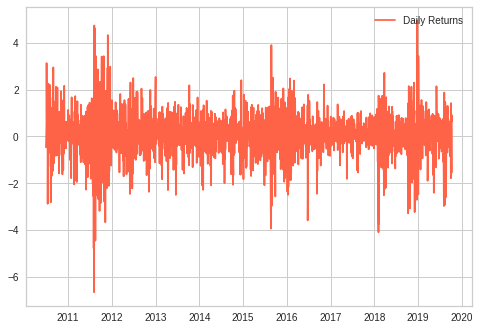

In [8]:
# plot the data
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

**Conclusion**

+ *Excellent travail! Comme le montre le graphique, le marché a connu des périodes de forte volatilité suivies de périodes de faible volatilité. Ensuite, voyons comment les modèles GARCH relèvent le défi posé par le regroupement de la volatilité.*

####**Calculer la volatilité**
+ Dans cet exercice, vous apprendrez à calculer et à convertir la volatilité des rendements des prix en Python.

+ Tout d'abord, vous calculerez la volatilité quotidienne comme l'écart type des rendements des prix. Convertissez ensuite la volatilité quotidienne en volatilité mensuelle et annuelle.

+ ***La série chronologique S&P 500 a été préchargée dans sp_data, et le rendement du prix en pourcentage est stocké dans la colonne « Retour ».***

####**Instructions**
+ Tracez la colonne 'Retour' dans sp_data.
+ Calculez l'écart-type des données 'Retour'.
+ Calculez la volatilité mensuelle à partir de la volatilité quotidienne.
+ Calculez la volatilité annuelle à partir de la volatilité quotidienne.

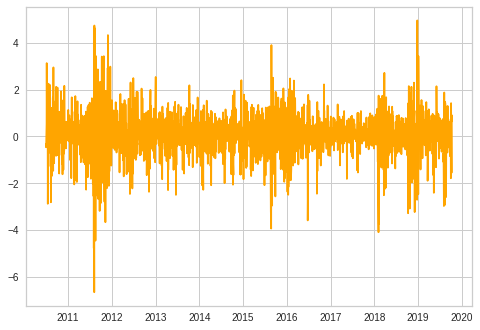

Daily volatility:  0.92%


In [9]:
# Plot the price returns
plt.plot(sp_data['Return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

In [10]:
import math

In [11]:
# Daily volatility:  0.94%
# Monthly volatility:  4.31%
# Annual volatility:  14.92%

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

Monthly volatility:  4.20%
Annual volatility:  14.54%


**Conclusion**

+ *Travail formidable! Remarquez que le marché est en effet risqué. La volatilité annualisée du S&P 500 indique que les rendements réels du S&P 500 peuvent fluctuer de plus de 10 % autour du rendement moyen*

###**Que sont $ARCH$ et $GARCH$**

###**1. Que sont $ARCH$ et $GARCH$**
+ ***Dans cette leçon, plongeons dans les modèles $GARCH$.***

###**2. Il y a d’abord eu l’$ARCH$**

+ ***Avant $GARCH$, les modèles $ARCH$ sont d’abord arrivés***. 

+ ***$ARCH$ signifie « Auto-Regressive Conditional Heteroskedasticity », et a été développé par l’économiste américain Robert F. Engle en 1982***. 

+ ***Ici, « hétéroscédasticité conditionnelle » signifie que les données ont des caractéristiques variables et imprévisibles en fonction du temps. En raison de sa contribution, Engle a remporté le prix Nobel d’économie en 2003.***

###**3. Puis vint le $GARCH$**


+ **Basés sur $ARCH$, les modèles $GARCH$ ont été développés par l’économiste danois Tim Bollerslev en 1986. Le « G » de $GARCH$ signifie « Généralisé ». Fait amusant: Bollerslev a écrit sur les modèles $GARCH$ dans sa thèse de doctorat, sous la supervision d’Engle, qui était l’inventeur des modèles $ARCH$.**

###**4. Termes statistiques connexes**

+ ***Avant de plonger dans les équations du modèle $GARCH$, clarifions quelques termes de base.*** 

+ ***Un processus de bruit blanc contient une séquence de variables aléatoires qui ne peuvent pas être prédites***. 

+ ***Une série chronologique est un bruit blanc si les variables sont indépendantes et distribuées de manière identique avec une moyenne de zéro.*** 

+ ***Un résidu est la différence entre la valeur observée d’une variable à l’instant t et sa valeur prédite basée sur les informations disponibles avant l’instant $t$.*** 

+ ***Si le modèle de prédiction fonctionne correctement, les résidus successifs ne sont pas corrélés les uns aux autres, c’est-à-dire qu’ils constituent une série temporelle de bruit blanc.***

+ *En d’autres termes, le modèle a pris en charge toutes les composantes prévisibles d’une série chronologique, ne laissant que la partie de bruit blanc imprévisible.*

###**5. Notions types**


+ Supposons qu’à l’instant $t$, nous voulons prédire le rendement $r_t$ en utilisant des informations à partir du temps $t-1$. 

+ Cela peut être noté comme le retour attendu ou moyen $μ$ du temps $t$. La prédiction ne sera pas parfaite, donc le rendement prédit $r_t$ est égal au rendement moyen $μ_t$ plus le $ε_t$ résiduel. 

+ De même, nous pouvons prédire la volatilité du temps $t$ comme la variance attendue étant donné l’information connue sous le nom de temps $t-1$. 

+ La volatilité n’est pas directement observable, mais elle est liée à l’erreur de prédiction. 

+ Comme discuté précédemment, si la prédiction fonctionne bien, le résidu devrait être égal à la volatilité multipliée par une variable aléatoire d’un processus de bruit blanc. 

+ ***Maintenant, il s’agit de savoir comment prédire la volatilité à l’instant $t$? Voyons comment les modèles $ARCH$ et $GARCH$ abordent ce problème***.

###**6. Équations du modèle : $ARCH$**

+ L’équation du modèle $ARCH$ avec le décalage $p$ est définie comme suit. 

+ ***Essentiellement, il modélise la variance comme une moyenne pondérée des résidus passés jusqu’au décalage $p$***. 

+ Par conséquent, le modèle $ARCH(1)$ déclare: 
  + ***la variance du temps $t$ est égale à un oméga constant, plus alpha fois le carré résiduel du temps $t-1$.***

###**7. Équations du modèle : $GARCH$**

+ En pratique, les modèles $GARCH$ sont plus couramment utilisés par les chercheurs. 

+ L’équation du modèle $GARCH(p,q)$ est la suivante. 

+ **Outre les décalages de la période $p$ des résidus, les modèles $GARCH$ ajoutent des décalages de variances de la période $q$ pour prédire la variance actuelle**. 

+ ***Par conséquent, un modèle $GARCH (1,1)$ de base déclare: la variance du temps $t$ est la somme de trois composantes: une constante oméga, alpha fois le carré résiduel du temps $t-1$ et la variance bêta du temps $t-1$***.

###**8. Modéliser l’intuition**
+ Ne vous laissez pas intimider par les équations. 

+ Les modèles $GARCH$ peuvent être compris intuitivement. 

+ Tout d’abord, le modèle est de nature autorégressive. 

+ Il tente d’estimer la volatilité à l’instant $t$ sur la base d’informations connues sous le nom de temps $t-1$. 

+ Deuxièmement, il estime la volatilité comme une moyenne pondérée des informations passées.

###**9. Contraintes des paramètres $GARCH(1,1)$**

+ **Pour rendre un processus $GARCH(1,1)$ réaliste, il y a deux conditions.** 

+ **Tout d’abord, il exige que tous les paramètres, oméga, alpha et bêta, soient non négatifs. Cela garantit que la variance ne peut pas être négative**. 

+ ***Deuxièmement, alpha plus bêta doit être inférieur à un, ce qui garantit que la variance estimée du modèle est toujours un « retour moyen » à la variance à long terme. La variance à long terme est égale à oméga divisé par un moins alpha moins bêta.***

###**10. Dynamique des paramètres $GARCH(1,1)$**
+ La règle empirique concernant les paramètres du modèle est la suivante : 
  + **plus l’alpha est important, plus l’impact immédiat des chocs est important**. 
  
+ **Ici, les chocs sont exprimés sous forme de résidus ou d’erreurs de prédiction**. 

+ *Si nous gardons l’alpha fixe, plus le bêta est important, plus la durée de l’impact est longue, c’est-à-dire que les périodes de volatilité élevée ou faible ont tendance à persister.*

###**11. Entraînons-nous!**
+ C’est beaucoup à digérer. Maintenant, il est temps de pratiquer!

###**EXERCICE**

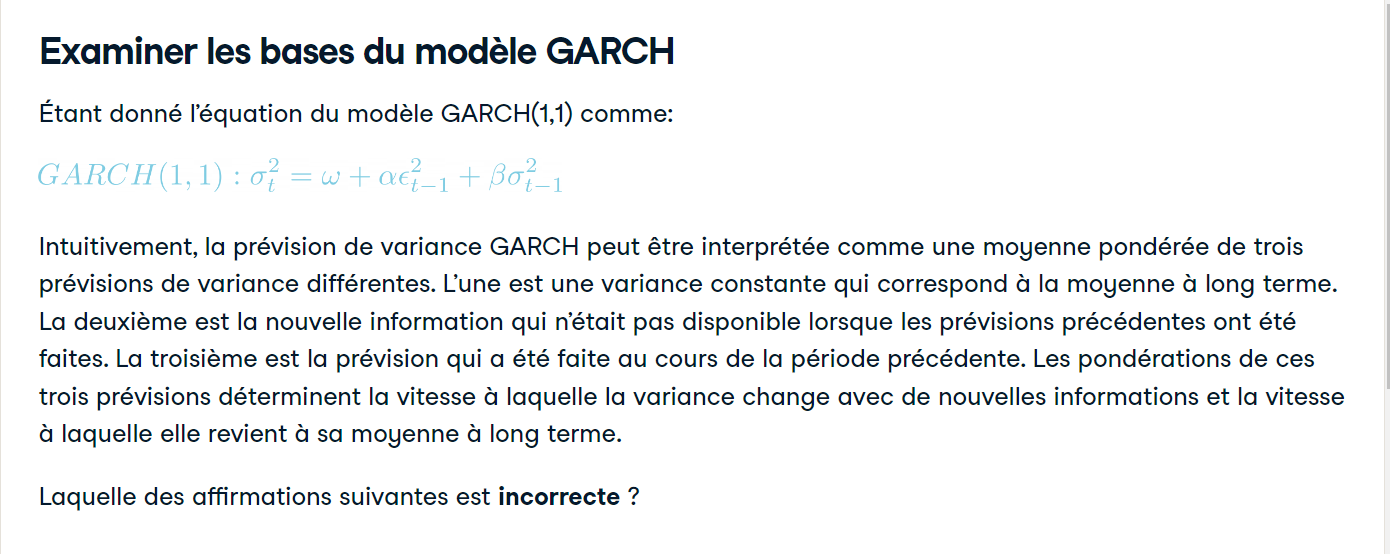


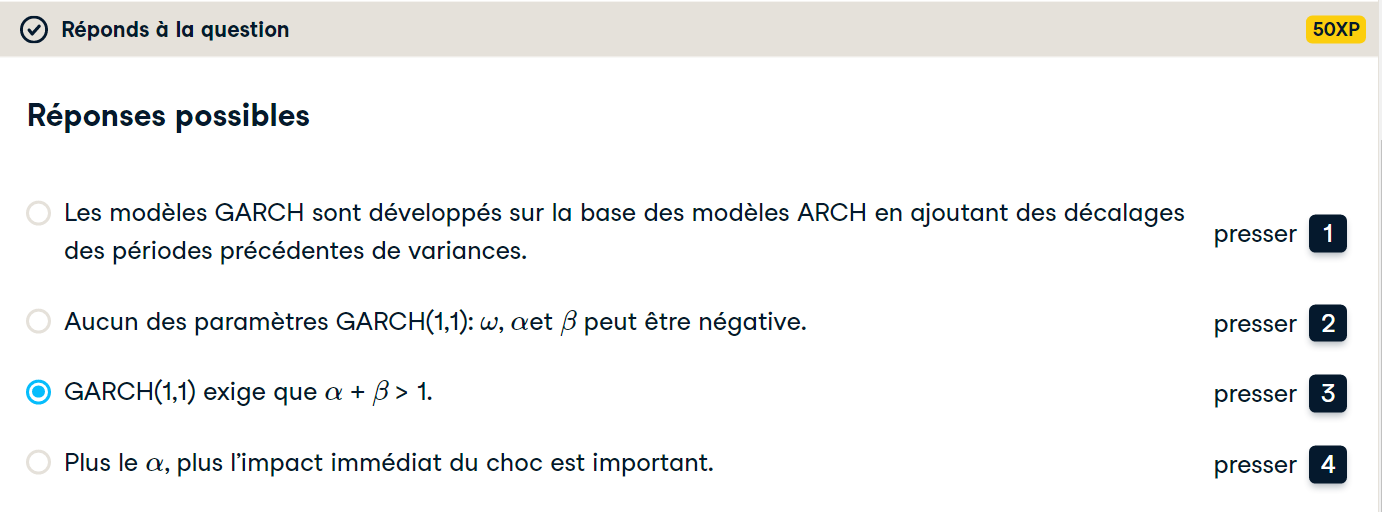

**Conclusion**

+ Travail fantastique! Bien au contraire, $GARCH(1,1)$ nécessite $\alpha + β < 1$ pour s’assurer de l’écart estimé $σ^2$ revient à la variance à long terme.

###**EXERCICE**

####**Simuler les séries $ARCH$ et $GARCH$**


+ Dans cet exercice, vous allez simuler respectivement une série chronologique $ARCH(1)$ et $GARCH(1,1)$ à l'aide d'une fonction prédéfinie **simul_GARCH(n, omega, alpha, beta = 0)**.

+ Rappelons que la différence entre un modèle $ARCH(1)$ et un modèle $GARCH(1,1)$ est : 
  + outre une composante autorégressive de $\alpha$ en multipliant le résidu de lag-1 au carré, un modèle GARCH inclut une composante de moyenne mobile de $\beta$ multipliant la variance de lag-1.

+ La fonction prédéfinie simulera une série $ARCH/GARCH$ basée sur $n$ (nombre de simulations), oméga, alpha et bêta (0 par défaut) que vous spécifiez. Il renverra des résidus et des variances simulés. 

+ *Ensuite, vous tracerez et observerez les variances simulées à partir des processus $ARCH$ et $GARCH$.*

####**Instructions**
+ Simulez un processus $ARCH(1)$ avec *oméga = 0,1, alpha = 0,7*.
+ Simulez un processus $GARCH(1,1)$ avec *oméga = 0,1, alpha = 0,7 et bêta = 0,1*.
+ Tracez les variances $ARCH$ simulées et les variances $GARCH$ respectivement.

In [16]:
sns.set_style('darkgrid')

In [17]:
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

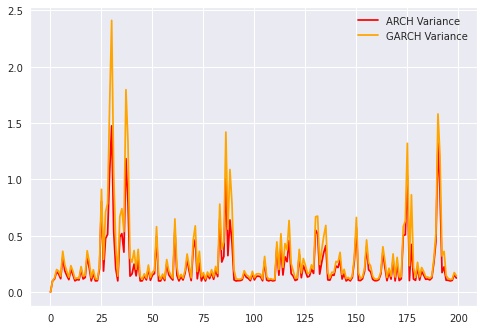

In [18]:
# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)
# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

####**Observer l'impact des paramètres du modèle**

+ ***Dans cet exercice, vous appellerez à nouveau la fonction prédéfinie simulator_GARCH() et étudierez l'impact des paramètres du modèle $GARCH$ sur les résultats simulés***.

+ ***Plus précisément, vous simulerez deux séries chronologiques $GARCH (1,1)$, elles ont les mêmes oméga et alpha, mais un bêta différent en entrée***.

+ *Rappel dans $GARCH(1,1)$, puisque $\beta$ est le coefficient de variance de lag-1, si le $\alpha$ est fixe, plus le $\beta$ est grand
, plus la durée de l'impact est longue. En d'autres termes, les périodes de volatilité élevée ou faible ont tendance à persister. Faites attention aux résultats tracés et voyez si vous pouvez vérifier l'impact $\beta$*.

####**Instructions**

+ 1)
  + Générez un processus $GARCH(1,1)$ avec 200 simulations, oméga = 0,1, alpha = 0,3 et bêta = 0,2 en entrée.

+ 2)
  + Générez un processus $GARCH(1,1)$ avec 200 simulations, oméga = 0,1, alpha = 0,3 et bêta = 0,6 en entrée.

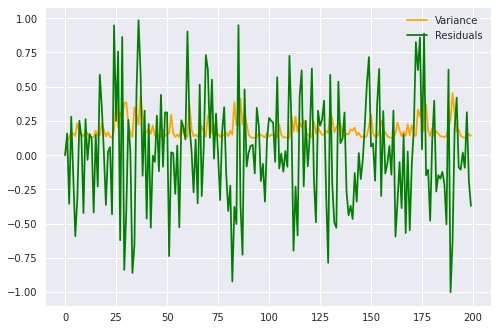

In [19]:
# First simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

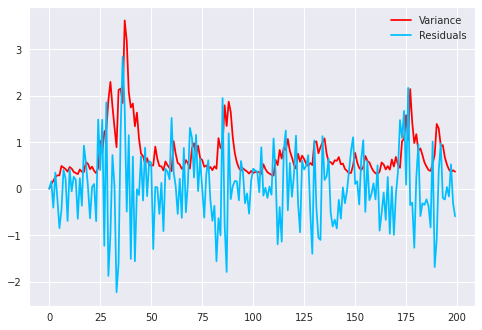

In [20]:
# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

###**Comment implémenter des modèles GARCH en Python**

####**1. Comment implémenter des modèles GARCH en Python**

+ ***Dans cette leçon, apprenons à implémenter des modèles GARCH en Python.***

####**2. Paquet Python « arch »**
+ ***Nous pouvons implémenter facilement des modèles GARCH en Python avec des fonctions prédéfinies dans le paquet « arch »***. 

+ ***Pour importer le module, indiquez simplement « from arch import arch_model », où arch_model est la fonction que nous utiliserons pour définir les modèles GARCH.***

  + Kevin Sheppard. (28 mars 2019). bashtage/arch : 
    + Version 4.8.1 (Version 4.8.1). 
    + Zénon. http://doi.org/10.5281/zenodo.2613877


####**3. Flux de travail**

+ ***Il y a trois étapes pour développer un modèle GARCH avec le package « arch »***. 

+ Tout d’abord, nous spécifions le modèle en définissant des hypothèses de modèle. 

+ Ensuite, nous adaptons le modèle avec des données. 

+ ***Enfin, nous utilisons le modèle ajusté pour faire une prévision. Ensuite, apprenons à implémenter chaque étape en Python.***

####**4. Spécification du modèle**

+ ***Il existe principalement trois types d’hypothèses à spécifier pour un modèle GARCH***. 

+ ***La première est l’hypothèse de distribution des résidus, qui inclut la distribution « normale » par défaut, « $t$ » comme distribution $t$ de Student, « asymétrique » comme distribution $t$ de Student asymétrique, et plus encore***. 

+ ***La seconde est l’hypothèse du modèle moyen***. 

+ ***Spécifiez la moyenne « constante » par défaut qui est commune à la plupart des rendements d’actifs financiers liquides***. D’autres options incluent « zéro » pour la 

+ moyenne nulle, « $AR$ » pour la moyenne autorégressive, et plus encore.

+  Enfin, spécifiez le modèle de volatilité à « GARCH » par défaut. 

+ D’autres options incluent « ARCH », « EGARCH », et plus encore. 

+ Ne vous sentez pas dépassé par ces options. Nous en discuterons plus en détail plus tard. 

+ Maintenant, gardons les choses simples et restons fidèles au paramètre par défaut. 

+ De plus, nous ne nous adapterons qu’au modèle GARCH(1,1), et il est spécifié en faisant $p$ égal à 1 et $q$ égal à 1.

####**5. Montage du modèle**
+ ***Nous pouvons ajuster le modèle dans une simple ligne de code avec la méthode « fit() ». Spécifiez « update_freq = $n$ » pour afficher la sortie de montage du modèle après chaque $n$ itérations. Éteignez l’affichage en spécifiant « disp = 'off' ».***

####**6. Résultats ajustés: paramètres**

+ ***Les paramètres oméga, alpha et bêta du modèle GARCH sont estimés à l’aide de la « méthode du maximum de vraisemblance ». Cela signifie que le processus d’ajustement tente de trouver les valeurs de paramètres pour lesquelles le modèle GARCH est le plus susceptible d’avoir généré les données de séries chronologiques observées. Nous pouvons vérifier directement les paramètres en nous référant aux « paramètres » dans le résultat du modèle ajusté***.

####**7. Résultats ajustés: résumé**
+ Nous pouvons imprimer le résumé de l’ajustement du modèle. 

+ Les résultats présentent clairement l’information dans des sections qui correspondent aux hypothèses du modèle. 

+ Nous pouvons également trouver les paramètres du modèle en bas à gauche sous la section « Modèle de volatilité ».

####**8. Résultats ajustés: placettes**
+ Nous pouvons tracer les résultats du modèle ajusté. 

+ Par défaut, il affichera les résidus standardisés estimés du modèle et la volatilité conditionnelle. 

+ Ne vous inquiétez pas de la signification de « résidus standardisés », nous en apprendrons plus à ce sujet dans les leçons ultérieures.

####**9. Prévision du modèle**
+ ***Enfin, nous pouvons utiliser « forecast() » pour faire des prédictions de volatilité avec le modèle adapté***. 

+ ***Spécifiez « horizon = $n$ » pour effectuer une prévision à $n$ périodes***. 

+ Nous pouvons vérifier le résultat de la prévision par « variance ». 

+ La valeur dans la colonne « h-dot-1 » est la prévision à 1 étape, tandis que la valeur dans « h-dot-5 » est la prévision à 5 étapes. 

+ La sortie est alignée de sorte que la colonne « Date » soit les données finales utilisées pour générer la prévision. 

+ C’est-à-dire que la valeur h-dot-1 à la ligne « 2019-10-10 » est la prévision à 1 étape réalisée à l’aide de données jusqu’à cette date incluse.

####**10. Entraînons-nous!**
+ Maintenant, c’est votre tour. Bonne pratique!

###**EXERCICE**

####**Consulter la documentation "arch"**

+ ***Le package Python Arch fournit un moyen complet d'implémenter des modèles GARCH***. 

+ ***Utilisez la méthode code help(arch_model) pour vérifier la documentation de la fonction arch_model() et répondez à la question ci-dessous*** :

  + *Lequel des éléments suivants ne fait pas partie des paramètres de modèle dans arch_model() ?*

####**Instructions**


+ moyenne

+ variance

+ ***volalitilité***

+ distance

In [25]:
help(arch_model)

Help on function arch_model in module arch.univariate.mean:

arch_model(y: 'Optional[ArrayLike]', x: 'Optional[ArrayLike]' = None, mean: "Literal[('Constant', 'Zero', 'LS', 'AR', 'ARX', 'HAR', 'HARX', 'constant', 'zero')]" = 'Constant', lags: 'Union[None, int, List[int], Int32Array, Int64Array]' = 0, vol: "Literal[('GARCH', 'ARCH', 'EGARCH', 'FIGARCH', 'APARCH', 'HARCH', 'FIGARCH')]" = 'GARCH', p: 'Union[int, List[int]]' = 1, o: 'int' = 0, q: 'int' = 1, power: 'float' = 2.0, dist: "Literal[('normal', 'gaussian', 't', 'studentst', 'skewstudent', 'skewt', 'ged', 'generalized error')]" = 'normal', hold_back: 'Optional[int]' = None, rescale: 'Optional[bool]' = None) -> 'HARX'
    Initialization of common ARCH model specifications
    
    Parameters
    ----------
    y : {ndarray, Series, None}
        The dependent variable
    x : {np.array, DataFrame}, optional
        Exogenous regressors.  Ignored if model does not permit exogenous
        regressors.
    mean : str, optional
       

####**Implémenter un modèle GARCH de base**


+ *Dans cet exercice, vous vous familiariserez avec le package Python arch et utiliserez ses fonctions telles que* ***arch_model()*** *pour implémenter un modèle* ***GARCH(1,1)***.

+ ***Définissez d'abord un modèle GARCH(1,1) de base, puis ajustez le modèle, examinez le résumé de l'ajustement du modèle et tracez les résultats.***

+ *Les données permettant d'utiliser les données de rendement des prix du S&P 500 ont été préchargées en tant que sp_data. De plus, le package arch a été importé pour vous.*

####**Instructions**
+ Définissez un modèle GARCH(1,1) basic_gm avec une moyenne "constante" et une distribution "normale" des résidus.
+ Ajustez le modèle basic_gm.
+ Imprimer un résumé du modèle GARCH ajusté.
+ Tracez le résultat estimé du modèle.

In [26]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


In [27]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Sat, Jan 21 2023   Df Residuals:                     2335
Time:                        12:38:56   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

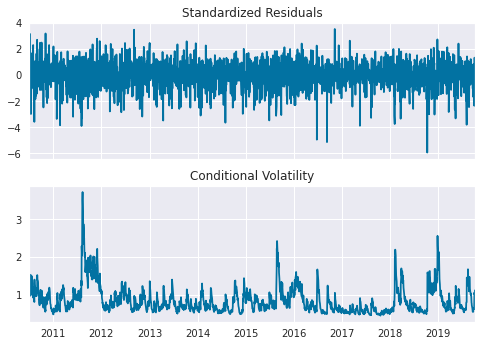

In [28]:
# Plot fitted results
gm_result.plot()
plt.show()

####**Faire des prévisions avec les modèles GARCH**

+ Auparavant, vous avez implémenté un modèle $GARCH(1,1)$ de base avec le package $Arch$ Python. 
+ Dans cet exercice, vous vous entraînerez à faire une prévision de volatilité de base.

+ Vous utiliserez à nouveau les rendements historiques des séries chronologiques du S&P 500. 

+ Commencez par définir et ajuster un modèle GARCH(1,1) avec toutes les observations disponibles, puis appelez **.forecast()** pour faire une prédiction. 

+ Par défaut, il produit une estimation en avance d'une étape. Vous pouvez utiliser horizon = $n$ pour spécifier des périodes à terme plus longues.

+ *Le package arch a été préchargé pour vous*.

####**Instructions**
+ Définissez un modèle de base GARCH(1,1) basic_gm.
+ Monter le modèle.
+ Utilisez le modèle ajusté gm_result pour faire une prévision de variance à 5 périodes.
+ Imprimez le résultat de la prévision d'écart.

In [29]:
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

In [31]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)
# Print the forecast variance
print(gm_forecast.variance[-1:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2019-10-10  0.994079  0.988366  0.982913  0.977708  0.972741


*Conclusion*

+ ***Travail fantastique! Vous venez de finir le chapitre 1 ! Remarquez dans la sortie, la valeur dans h.1 est une prévision à 1 pas, tandis que les valeurs dans h.2, …, h.5 sont des prévisions à 2, …, 5 pas. Vous avez maintenant acquis une expérience pratique avec le modèle GARCH***.

###**Hypothèses de distribution**

####**1. Hypothèses de distribution**
+ Salut et bon retour! Dans ce chapitre, plongeons dans **les hypothèses du modèle GARCH et voyons comment nous pouvons définir un meilleur modèle**.

####**2. Pourquoi faire des suppositions**


+ ***La volatilité n’est pas une quantité directement observable et est estimée par les fluctuations du rendement des prix***. 

+ ***Les rendements sont égaux aux rendements moyens plus les résidus, et les résidus sont des chocs de rendement stochastiques dépendant de l’ampleur de la volatilité.*** 

+ ***Par conséquent, pour modéliser la volatilité, les modèles GARCH nécessitent de faire des hypothèses de distribution des résidus et des rendements moyens***. 

+ *Et pour définir un bon modèle, nous voulons avoir des hypothèses les plus représentatives des données réelles.*

####**3. Résidus normalisés**
+ **Discutons d’abord des hypothèses des modèles GARCH sur les résidus standardisés**. 

+ ***Les résidus de rappel sont les différences entre les rendements prévus et les rendements moyens***. 

+ ***Et les résidus standardisés sont les résidus divisés par la volatilité estimée du modèle***. 

+ ***Par défaut, les modèles GARCH supposent une distribution normale pour les résidus standardisés, qui est la courbe symétrique en forme de cloche que nous voyons souvent***. 

+ Mais le monde financier est rarement aussi idéal.

####**4. Résidus dans GARCH**

+ ***En Python, les résidus du modèle GARCH sont accessibles à partir du résultat du modèle ajusté par « resid », et la volatilité GARCH est accessible par « conditional_volatility »***. 

+ ***Par conséquent, les résidus standardisés sont calculés en divisant les résidus du modèle par la volatilité conditionnelle***. 

+ Nous pouvons également tracer un histogramme des résidus standardisés pour revoir sa courbe de distribution.

####**5. Queues grasses**
+ Souvent, les courbes de distribution des rendements des prix présentent des queues grasses. 

+ C’est-à-dire qu’il y a une probabilité plus élevée d’observer des rendements très importants, positifs ou négatifs, que dans une distribution normale.

####**6. Asymétrie**
+ Les courbes de distribution ont également tendance à présenter une asymétrie ou une asymétrie. 

+ L’inclinaison négative signifie que la queue gauche de la courbe de distribution est plus longue, de sorte que la masse de la distribution est à droite de la figure. 

+ Inversement, l’inclinaison positive a une queue droite plus longue et la masse de la distribution est concentrée sur la gauche.

####**7. Distribution t de l’élève**
+ Pour améliorer les modèles GARCH avec des hypothèses plus représentatives des données financières réelles, nous pouvons spécifier que l’hypothèse de distribution est la « distribution $t$ de Student ». 

+ La distribution $t$ de Student est symétrique et en forme de cloche, comme la distribution normale, mais a des queues plus lourdes, ce qui signifie qu’elle est plus encline à produire des valeurs qui tombent loin de sa moyenne. 

+ Le paramètre nu de la distribution $t$ d’un Student indique sa forme. Plus le nu est grand, plus la courbe atteint un sommet.

####**8. GARCH avec distribution $t$**
+ Pour spécifier l’hypothèse de distribution à la distribution $t$ de Student en Python, définissez simplement « dist » égal à « $t$ » lors de la définition du modèle GARCH. 

+ Après avoir ajusté le modèle, nous pouvons trouver le paramètre nu dans la section « Distribution » du résumé du modèle.

####**9. GARCH avec distribution $t$ asymétrique**
+ De plus, pour modéliser l’asymétrie dans la distribution, nous pouvons spécifier que l’hypothèse de distribution est la « distribution $t$ de Student asymétrique ». 

+ ***En Python, définissez simplement « dist » égal à « skewt » lors de la définition d’un modèle GARCH.***

+ En plus de $ν$, la distribution $t$ de A Student asymétrique a un paramètre lambda pour indiquer l’asymétrie . 

+ ***Lorsque lambda est égal à 0, la distribution est identique à la distribution $t$ standard de Student et symétrique.*** 

+ ***Lorsque lambda est inférieur à 0, la distribution est négativement biaisée, et inversement. Lambda est compris entre -1 et 1.***

####**10. Entraînons-nous!**
+ Maintenant, c’est votre tour!

###**EXERCICE**

####**Queues grasses et asymétrie**

+ ***Les modèles GARCH permettent de préciser les hypothèses de distribution des résidus standardisés***. 

+ ***Par défaut, une distribution normale est supposée, qui a une courbe de densité de probabilité symétrique en forme de cloche. D’autres options incluent la distribution $t$ de Student et la distribution $t$ asymétrique de Student.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**

+ Une distribution avec des queues grasses implique une plus grande possibilité d’observer des événements extrêmes.

+ ***Plus le $ν$ de la distribution $t$ d’un Student, plus la courbe de distribution est élevée.***

+ Quand $λ= 0$, la distribution $t$ asymétrique de Student est identique à la distribution $t$ d’un Student.

+ Une distribution avec un biais négatif signifie que la queue gauche de la courbe de distribution est plus longue.

*CONCLUSION*

***Excellent travail! Bien au contraire, plus le 
$ν$ de la distribution $t$ d’un Student, plus la courbe de distribution est élevée.***

###**Répartition graphique des résidus standardisés**

+ ***Les modèles GARCH font des hypothèses de distribution des résidus standardisés.*** 

+ ***Les résidus de rappel sont les différences entre les rendements prédits et les rendements moyens.*** 

+ ***Et les résidus standardisés sont les résidus divisés par la volatilité estimée du modèle.***

+ *Dans cet exercice, vous vous entraînerez à calculer les résidus standardisés à partir d'un modèle GARCH ajusté, puis à tracer son histogramme avec une distribution normale standard normal_resid.*

+ *Un modèle GARCH a été défini et ajusté avec les données de rendement des prix du S&P 500. Le résultat ajusté est accessible en tant que gm_result. De plus, matplotlib a été préchargé en tant que plt.*

####**Instructions**
+ Obtenez les résidus estimés du modèle et enregistrez-les dans gm_resid.
+ Obtenez la volatilité estimée du modèle et enregistrez-la dans gm_std.
+ Calculez les résidus standardisés gm_std_resid.
+ Tracez un histogramme de gm_std_resid.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


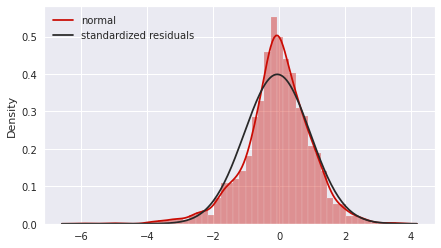

In [35]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

#plt.hist(gm_std_resid, bins = 50, 
#         facecolor = 'orange', label = 'Standardized residuals')
#plt.hist(normal_resid, bins = 50, 
#         facecolor = 'tomato', label = 'Normal residuals')
#plt.legend(loc = 'upper left')
#plt.show()

*Conclusion*

***Travail incroyable! Notez que par rapport à une distribution normale standard, la courbe de distribution des résidus standardisés des modèles GARCH présente plus de pics, une asymétrie et un biais négatif.***

####**Ajuster un GARCH avec une distribution en $t$ asymétrique**


+ ***L'hypothèse de distribution normale par défaut des résidus standardisés utilisés dans les modèles GARCH n'est pas représentative du monde financier réel. Les queues épaisses et l'asymétrie sont fréquemment observées dans les données sur les rendements financiers.***

+ *Dans cet exercice, vous allez améliorer le modèle GARCH en utilisant une hypothèse de distribution $t$ de Student asymétrique. De plus, vous comparerez la volatilité estimée du modèle avec celle d'un modèle avec une hypothèse de distribution normale en les traçant ensemble.*

+ *Un modèle GARCH avec l'hypothèse de distribution normale par défaut a été ajusté pour vous et son estimation de volatilité est enregistrée dans normal_vol*.

####**Instructions**
+ Définissez un modèle GARCH skewt_gm avec une hypothèse de distribution t de Student asymétrique.
+ Ajustez le modèle et enregistrez le résultat dans skewt_result.
+ Enregistrez la volatilité conditionnelle estimée du modèle dans skewt_vol.
+ Tracez skewt_vol avec les estimations GARCH normales et les données de retour réelles.

In [36]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 77926.86112265919
Iteration:      2,   Func. Count:     19,   Neg. LLF: 147440.0251835162
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53482.232549969376
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5832.5998015417335
Iteration:      5,   Func. Count:     46,   Neg. LLF: 93659.75814882081
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5423.856962822037
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4658.65008552914
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2690.3468398195937
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2691.2805584555344
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2690.4857728893876
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2689.990911767527
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2689.9812755508756
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2689.979806553789
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2689.

In [37]:
# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

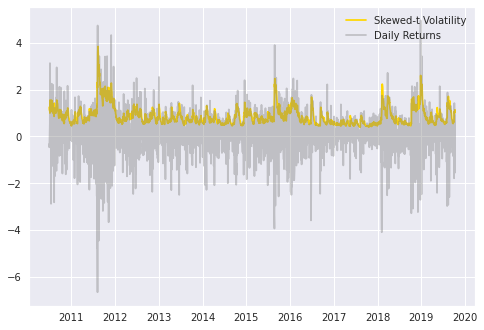

In [38]:
# Plot model fitting results
plt.plot(skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(sp_data['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

###**Spécifications moyennes du modèle**


####**1. Spécifications moyennes du modèle**

+ ***Dans la leçon précédente, nous avons discuté des hypothèses de distribution pour les modèles GARCH. Dans cette leçon, discutons des hypothèses du modèle moyen.***

####**2. Moyenne constante par défaut**

+ ***Par défaut, les modèles GARCH en Python utilisent une hypothèse moyenne constante, qui fonctionne généralement bien avec la plupart des données courantes sur les actifs financiers.***

####**3. Hypothèse de moyenne nulle**

+ Nous pouvons également spécifier une hypothèse de moyenne nulle. 

+ Ceci est utile si la moyenne de la série chronologique a été modélisée séparément par un autre processus, tel que les **modèles autorégressifs (AR), de moyenne mobile (MA) ou d’ARMA**. 

+ ***Et nous utilisons les résidus de ce modèle pour estimer la volatilité***. 

+ ***De nombreux praticiens préfèrent cette approche pour séparer le processus de modélisation de la moyenne et de la volatilité***.

####**4. Moyenne autorégressive**
+ ***En outre, nous pouvons choisir de modéliser la moyenne comme un processus autorégressif, de sorte que la moyenne actuelle est corrélée avec les données précédentes. ***

+ ***Cela peut être implémenté en Python en définissant le modèle moyen sur « AR » et en spécifiant le nombre de décalages***. 

+ En raison de la portée de ce cours, nous ne plongerons pas dans les **modèles autorégressifs, tels que les modèles AR, MA ou ARMA**. 

+ Si vous souhaitez en savoir plus à leur sujet, consultez d’autres excellents cours sur DataCamp tels que « Analyse de séries chronologiques en Python ».

####**5. Entraînons-nous!**
+ Maintenant, c’est à votre tour de pratiquer!

###**EXERCICE**

####**Vérifier les hypothèses moyennes du modèle**

+ ***Un modèle GARCH a été défini et ajusté, avec son résultat enregistré sous gm_result. Exécutez une commande dans la console pour consulter le résumé de l'adaptation du modèle et répondez à la question ci-dessous*** :

  + *Quelle hypothèse de modèle moyenne est utilisée lors de la définition du modèle GARCH?*

####**Instructions**

+ Zéro moyen

+ ***Moyenne autorégressive***

+ Moyenne constante

*CONCLUSION*

+ ***Merveilleux travail! Comme vous pouvez le voir dans le résumé de l'ajustement du modèle, "AR" indique que le modèle GARCH utilise une hypothèse de moyenne autorégressive. Et sous la section "Mean Model", le Return[1] indique qu'un décalage d'une période est utilisé.***

####**Effet du modèle moyen sur les prévisions de volatilité**
+ ***En pratique, les rendements et la volatilité sont modélisés dans des processus distincts. Généralement, les hypothèses moyennes influencent les rendements prévus, mais ont un effet mineur sur les estimations de la volatilité.***

+ *Dans cet exercice, vous examinerez l'impact des hypothèses de moyenne du modèle GARCH sur les estimations de volatilité en comparant deux modèles GARCH. Ils ont été définis avec différentes hypothèses moyennes et ajustés avec les données du S&P 500.*

+ *Le modèle avec hypothèse de "moyenne constante" a des résultats enregistrés dans cmean_result et une volatilité estimée enregistrée dans cmean_vol. Le modèle avec "AR(1)" ou hypothèse de moyenne autorégressive à 1 décalage a des résultats enregistrés dans armean_result et une volatilité estimée enregistrée dans armean_vol. Les modules matplotlib.pyplot et numpy ont été importés respectivement en tant que plt et np.*

####**Instructions**
+ Imprimez et examinez les résumés d'ajustement du modèle de cmean_result et armean_result.
+ Tracez l'estimation de la volatilité cmean_vol et armean_vol des deux modèles.
+ Utilisez la fonction .corrcoef() du package numpy pour calculer le coefficient de corrélation.

In [60]:
cmean = arch_model(sp_data['Return'], p = 1, q = 1,        
                          mean = 'AR', lags = 1, vol = 'GARCH')
cmean_result = cmean.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 14975.668591003618
Iteration:      2,   Func. Count:     18,   Neg. LLF: 107230367083.74564
Iteration:      3,   Func. Count:     27,   Neg. LLF: 69515201383.86053
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4260.955496165395
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3747.789840324751
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2779.0468588457543
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2778.149919123738
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2767.5757848036283
Iteration:      9,   Func. Count:     71,   Neg. LLF: 2767.543686884236
Iteration:     10,   Func. Count:     77,   Neg. LLF: 2767.5425369152445
Iteration:     11,   Func. Count:     83,   Neg. LLF: 2767.542155151932
Iteration:     12,   Func. Count:     89,   Neg. LLF: 2767.5421421304363
Iteration:     13,   Func. Count:     94,   Neg. LLF: 2767.5421421310184
Optimization terminated successfully    (Exit mode 0)
   

In [61]:
armean = arch_model(sp_data['Return'], p = 1, q = 1,        
                           mean = 'constant', lags = 1, vol = 'GARCH')
armean_result = armean.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

In [62]:
# Get model estimated volatility
cmean_vol = cmean_result.conditional_volatility

In [63]:
armean_vol = armean_result.conditional_volatility

In [64]:
# Print model summary of GARCH with constant mean
print(cmean_result.summary())
# Print model summary of GARCH with AR mean
print(armean_result.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                 Return   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2767.54
Distribution:                  Normal   AIC:                           5545.08
Method:            Maximum Likelihood   BIC:                           5573.86
                                        No. Observations:                 2335
Date:                Sat, Jan 21 2023   Df Residuals:                     2333
Time:                        14:05:49   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0815  1.496e-02      5.444  5.216e-

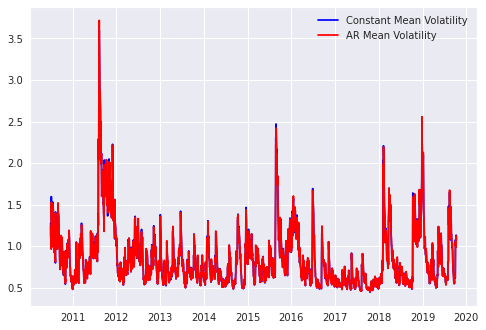

nan


In [65]:
# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper right')
plt.show()

# Check correlation of volatility estimations
print(np.corrcoef(cmean_vol, armean_vol)[0,1])

*Conclusion*

***Le coefficient de corrélation est proche de 1 et le graphique montre que l'estimation de la volatilité des deux modèles est très proche. En fait, l'impact des hypothèses du modèle moyen sur l'estimation de la volatilité est si faible que, si l'on s'intéresse uniquement à la dynamique de la volatilité, on peut généralement se contenter de supposer la spécification la plus simple, à savoir le modèle à moyenne constante.***

###**Modèles de volatilité pour les chocs asymétriques**

####**1. Modèles de volatilité pour les chocs asymétriques**


+ ***Jusqu’à présent, les modèles GARCH supposent des chocs symétriques sur la volatilité***. 

+ ***En d’autres termes, des variations positives ou négatives des rendements des prix auraient le même impact sur la volatilité***. 

+ ***Que se passe-t-il si cette hypothèse ne tient pas? Dans cette leçon, voyons comment modéliser les chocs asymétriques sur la volatilité***.

####**2. Chocs asymétriques dans les données financières**
+ Dans le monde financier réel, le marché a tendance à monter les escaliers et à descendre les ascenseurs. 

+ Quand les choses vont bien, les prix augmentent lentement et régulièrement; 

+ Lorsque les choses tournent mal, comme lors d’une crise financière, tout le monde panique et les prix plongent brusquement.

####**3. Effet de levier**


+ ***L’effet de levier fait référence à la tendance observée de la volatilité d’un actif à être corrélée négativement avec les rendements de l’actif.*** 

+ En règle générale, la hausse des cours des actions s’accompagne d’une baisse de la volatilité, et vice versa. 

+ Une explication économique de ce phénomène est la suivante : 
  + à mesure que les cours des actions baissent, les entreprises ont relativement moins de valeur d’actions par rapport à la valeur de leur dette. 
  
  + En d’autres termes, ils deviennent plus endettés puisque leurs ratios d’endettement par rapport aux capitaux propres augmentent, ce qui implique que leurs actions deviennent plus risquées.

####**4. GJR-GARCH**
+ ***GJR-GARCH est développé pour répondre à l’effet de choc asymétrique sur la volatilité. Son équation est très similaire au modèle GARCH standard, sauf qu’elle ajoute un paramètre conditionnel.*** 

+ Lorsque les chocs de retour sont négatifs, le paramètre conditionnel sera inclus dans l’équation pour tenir compte de l’impact supplémentaire.

####**5. GJR-GARCH en Python**

+ GJR-GARCH peut être facilement implémenté en Python en spécifiant que le « o » doit être 1 lors de la définition du modèle.

####**6. EGARCH**
+ **Un autre choix de modèle populaire pour traiter l’effet de choc asymétrique est le modèle EGARCH**. 

+ **E signifie « exponentiel » puisque EGARCH est basé sur la variance logarithmique au lieu de la variance elle-même**. 

+ L’équation réelle est un peu compliquée, nous allons donc sauter les détails. 

+ Un point intuitif à retenir est : 
  + **EGARCH ajoute un composant conditionnel pour modéliser l’asymétrie dans les chocs similaires au GJR-GARCH**. 
  
+ ***De plus, comme l’équation est basée sur la variance logarithmique, elle ne nécessite pas de contraintes non négatives sur alpha, bêta***. 

+ ***Par conséquent, il fonctionne plus rapidement pour maximiser la probabilité lors de l’ajustement du modèle.**

####**7. EGARCH en Python**
+ ***EGARCH est implémenté en Python en spécifiant le « o » à 1, et « vol » à « EGARCH » lors de la définition du modèle***

####**8. Quel modèle utiliser**


+ ***GJR-GARCH et EGARCH tentent tous deux de traiter les chocs d’asymétrie sur la volatilité, et le meilleur modèle dépend des données***. 

+ ***En pratique, essayez d’ajuster différents modèles au même jeu de données et sélectionnez celui qui offre les meilleures performances***. 

+ Nous discuterons plus en détail de l’évaluation du rendement des modèles au chapitre 3.

####**9. Entraînons-nous!**
+ Maintenant, c’est votre tour!


###**EXERCICE**

####**Modélisation des réponses asymétriques de la volatilité**

+ ***Les modèles GARCH supposent que les nouvelles positives et négatives ont un impact symétrique sur la volatilité. Cependant, en réalité, le marché a tendance à monter les escaliers et à descendre l’ascenseur. En d’autres termes, l’impact est généralement asymétrique, et les nouvelles négatives ont tendance à affecter la volatilité plus que les nouvelles positives.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**


+ La « courbe d’impact des nouvelles » rend compte de l’effet de choc asymétrique sur la volatilité.

+ L’effet de levier fait référence à la tendance observée de la volatilité d’un actif à être corrélée négativement avec les rendements de l’actif.

+ GJR-GARCH peut être implémenté en Python en spécifiant o = 1 lors de la définition du modèle.

+ ***GJR-GARCH est le seul choix pour modéliser la réponse asymétrique de la volatilité aux nouvelles positives et négatives***.

*CONCLUSION*

+ ***Excellent travail! Outre le modèle GJR-GARCH, EGARCH est également un choix populaire pour la modélisation des chocs asymétriques.***

####**Adapter les modèles GARCH à la crypto-monnaie**

+ ***Les marchés financiers ont tendance à réagir très différemment aux chocs de nouvelles positifs et négatifs, et un exemple est les fluctuations spectaculaires observées sur le marché de la crypto-monnaie ces dernières années***.

+ ***Dans cet exercice, vous implémenterez respectivement un modèle GJR-GARCH et un modèle EGARCH en Python, qui sont des choix populaires pour modéliser les réponses asymétriques de la volatilité. Vous travaillerez avec un ensemble de données de crypto-monnaie bitcoin_data, qui contient deux colonnes : "Close" price et "Return".***

+ *L'ensemble de données bitcoin_data a été préchargé pour vous et les prix historiques dans la colonne "Fermer" ont été tracés*.

####**Instructions**
+ 1)
  + Définissez un modèle GJR-GARCH comme gjr_gm.
  + Imprimez et examinez le résumé d'ajustement du modèle de gjrgm_result.

+ 2)
  + Définissez un modèle EGARCH comme egarch_gm.
  + Imprimez et examinez le résumé d'ajustement du modèle de earch_result.

In [66]:
bitcoin_data = pd.read_csv(
    'https://api.blockchain.info/charts/market-price?start=2010-10-09&timespan=12years&format=csv', 
                         names=['Timestamp','Close'], index_col='Timestamp')
bitcoin_data.index = pd.to_datetime(bitcoin_data.index, format='%Y-%m-%d')
bitcoin_data = bitcoin_data.loc[(bitcoin_data != 0.0).any(axis=1)]
bitcoin_data['Return'] = np.log(bitcoin_data['Close']).diff().mul(100) # rescale to faciliate optimization
bitcoin_data = bitcoin_data.dropna()
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2010-10-12 to 2022-10-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1460 non-null   float64
 1   Return  1460 non-null   float64
dtypes: float64(2)
memory usage: 34.2 KB


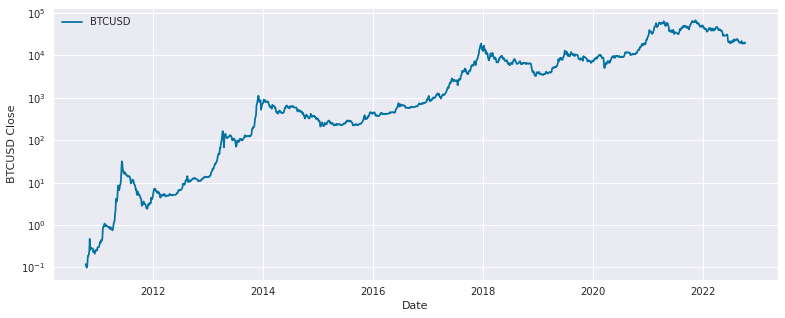

In [67]:
# Plot bitcoin price data 
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_yscale('log')
ax1.plot(bitcoin_data.index, bitcoin_data.Close, color='b', label='BTCUSD')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTCUSD Close')
ax1.legend()
plt.show()

In [68]:
# Specify model assumptions
gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')

# Fit the model
gjrgm_result = gjr_gm.fit(disp = 'off')

# Print model fitting summary
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -4845.90
Distribution:      Standardized Student's t   AIC:                           9703.80
Method:                  Maximum Likelihood   BIC:                           9735.51
                                              No. Observations:                 1460
Date:                      Sat, Jan 21 2023   Df Residuals:                     1459
Time:                              14:34:55   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0

In [69]:
# Specify model assumptions
egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')

# Fit the model
egarch_result = egarch_gm.fit(disp = 'off')

# Print model fitting summary
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -4838.46
Distribution:      Standardized Student's t   AIC:                           9688.93
Method:                  Maximum Likelihood   BIC:                           9720.64
                                              No. Observations:                 1460
Date:                      Sat, Jan 21 2023   Df Residuals:                     1459
Time:                              14:35:21   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0


*CONCLUSION*
+ ***Excellent! Ensuite, nous comparerons la volatilité estimée du modèle entre GJR-GARCH et EGARCH.***

####**Comparez GJR-GARCH avec EGARCH**
+ ***Auparavant, vous avez équipé un modèle GJR-GARCH et EGARCH avec des séries temporelles de retour Bitcoin. Dans cet exercice, vous allez comparer la volatilité conditionnelle estimée des deux modèles en traçant leurs résultats.***

+ **La volatilité estimée du modèle GJR-GARCH est enregistrée dans gjrgm_vol, et la volatilité estimée du modèle EGARCH est enregistrée dans egarch_vol. Vous les tracerez avec les observations de retour Bitcoin réelles, accessibles par la colonne "Retour" dans bitcoin_data.**

####**Instructions**
+ Tracez les retours réels de Bitcoin.
+ Tracé GJR-GARCH volatilité estimée.
+ Tracez la volatilité estimée par EGARCH.

In [70]:
gjrgm_vol = gjrgm_result.conditional_volatility
egarch_vol = egarch_result.conditional_volatility

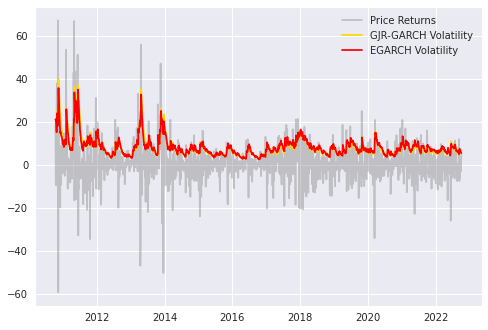

In [71]:
# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

In [72]:
# Print each models BIC
print(f'GJR-GARCH BIC: {gjrgm_result.bic}')
print(f'\nEGARCH BIC: {egarch_result.bic}')

GJR-GARCH BIC: 9735.512900491713

EGARCH BIC: 9720.64338815326


*CONCLUSION*

***Travail fantastique! Dans l'ensemble, les modèles GJR-GARCH et EGARCH ont réussi à ajuster les données réelles. Comparativement, GJR-GARCH est plus prudent dans l'estimation de la volatilité lorsqu'il est appliqué à l'ensemble de données Bitcoin.***

###**Prévision de la fenêtre roulante GARCH**

####**1. Prévision de la fenêtre roulante GARCH**
+ Auparavant, nous avons appris à spécifier les hypothèses du modèle GARCH. 

+ Apprenons maintenant à effectuer des prévisions de modèle GARCH avec des approches de fenêtre roulante.

####**2. Fenêtre glissante pour les prévisions hors échantillon**
+ Une partie passionnante de la modélisation financière est de faire des prédictions! 

+ ***Plus précisément, nous allons effectuer des prévisions de fenêtre glissante, où nous utilisons des données dans l’échantillon pour l’ajustement du modèle, effectuer des prévisions hors échantillon à 1 période d’avance et les faire de manière répétée au fil du temps.***

####**3. Extension des prévisions de fenêtre**


+ ***Il existe principalement deux façons d’effectuer une prévision de fenêtre roulante***. 

+ ***L’une est l’approche de « fenêtre d’expansion », qui commence par un ensemble d’exemples de données et, à mesure que le temps avance, ajoute continuellement de nouveaux points de données à l’échantillon.*** 

+ Supposons que nous ayons 200 observations d’une série chronologique. 

+ Tout d’abord, nous estimons le modèle avec les 100 premières observations pour prévoir le point de données 101. 

+ Ensuite, nous incluons l’observation 101 dans l’échantillon et estimons à nouveau le modèle pour prévoir le point de données 102. 

+ Le processus est répété jusqu’à ce que nous ayons prévu les 100 points de données hors échantillon.

####**4. Motivations de la prévision des fenêtres roulantes**

+ **La prévision par fenêtre roulante** est largement utilisée pour les motivations suivantes: 
  + **Tout d’abord, lorsque nous utilisons toutes les données pour ajuster un modèle, l’estimation du modèle présente un biais de rétrospective**. 
  
+ En réalité, nous ne connaissons pas l’avenir, de sorte que les données de séries chronologiques utilisées pour l’ajustement des modèles et les prévisions ne devraient pas se chevaucher. 

+ ***Deuxièmement, l’approche de la fenêtre roulante est moins sujette au surajustement***. 

+ ***Une hypothèse implicite de modélisation de séries chronologiques est que les paramètres du modèle sont stables dans le temps***. 

+ Mais cela n’est guère vrai dans un environnement de marché turbulent. 

+ Imaginez que lorsque nous essayons d’adapter un $GARCH(1,1)$ avec des observations de crise économique par rapport à des conditions de marché normales, nous sommes susceptibles d’obtenir des résultats oméga, alpha, bêta très différents. 

+ ***Troisièmement, l’approche de la fenêtre mobile peut mieux adapter nos prévisions aux changements***. 

+ En intégrant continuellement de nouvelles observations à l’ajustement et aux prévisions du modèle, nous sommes plus réactifs aux conditions économiques les plus récentes, telles que les nouvelles, les changements dans les cycles économiques, etc.

####**5. Mettre en œuvre l’expansion des prévisions de fenêtre**

+ Nous pouvons implémenter la prévision de fenêtre roulante GARCH en Python avec une boucle for. 

+ Lors de chaque itération, nous ajustons le modèle et faisons une prédiction. 

+ La prévision de fenêtre d’expansion a toujours la même observation initiale à partir des données de l’échantillon. 

+ Il peut être mis en œuvre en spécifiant first_obs dans le « fit() » comme étant un nombre fixe, ou s’il est omis, à partir de la première observation dans les données de l’échantillon.

####**6. Prévision fixe de la fenêtre de roulement**

+ Une autre méthode de prévision de fenêtre roulante est appelée « prévision de fenêtre roulante fixe ». 

+ De même, il commence par un ensemble d’exemples de données et, au fil du temps, de nouveaux points de données sont ajoutés. 

+ Ce qui est différent, c’est que les anciens points de données sont supprimés de l’échantillon simultanément pour maintenir une taille de fenêtre fixe.

####**7. Mettre en œuvre des prévisions de fenêtre mobile fixe**
+ La prévision de fenêtre mobile fixe peut être implémentée en spécifiant que « first_obs » et « last_obs » soient tous deux incrémentiels dans la boucle for. 

+ La taille de la fenêtre reste donc fixe.

####**8. Comment déterminer la taille de la fenêtre**


+ Dans la pratique, il n’existe pas de règle rigide pour le choix des tailles de fenêtres roulantes, et elle est généralement déterminée au cas par cas. 

+ Considérez ceci: lorsque nous prévoyons le taux de croissance du PIB américain en 2020, combien d’observations devrions-nous utiliser? 

+ Devrions-nous utiliser les données des 20 dernières années ou les données des 5 dernières années? 

+ Pour l’estimation de roulement, différentes tailles de fenêtre peuvent conduire à des performances de prévision très différentes. 

+ Une taille de fenêtre trop large peut inclure des points de données obsolètes, ce qui entraîne une variance de prédiction plus élevée, également appelée surajustement. 

+ Une taille de fenêtre trop étroite peut laisser de côté les données pertinentes aux conditions économiques actuelles, ce qui entraîne un biais de prévision accru. 

+ En bref, nous devons garder à l’esprit que la taille optimale de la fenêtre est un compromis pour équilibrer les biais et la variance.

####**9. Entraînons-nous!**
+ Maintenant, c’est à votre tour de pratiquer!

###**EXERCICE**

####**Pourquoi utiliser la prévision de fenêtre roulante**

+ ***La prévision par fenêtre mobile est très populaire dans la modélisation financière, car elle s’adapte aux nouvelles observations du marché à mesure que le temps avance. Il est généralement mis en œuvre avec une approche de « fenêtre d’expansion » ou de « fenêtre fixe ».***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**


+ La prévision hors échantillon est préférée dans la modélisation des séries chronologiques financières, car elle empêche le biais de rétrospective.

+ Une hypothèse implicite de modélisation de séries chronologiques est que les paramètres du modèle sont stables dans le temps. Mais cela n’est guère vrai dans un environnement de marché turbulent.

+ Pour une prévision de fenêtre mobile, la taille optimale de la fenêtre est un compromis entre biais et variance.

+ ***Plus nous incluons de données dans l’échantillon pour adapter un modèle GARCH, meilleures sont les prévisions que nous pouvons obtenir.***

*CONCLUSION*

+ ***Travail fantastique! Pour l’analyse de séries chronologiques, plus la taille de l’échantillon est grande, meilleures sont les performances du modèle. Une question valable que nous devrions toujours nous poser est la suivante: ces données sont-elles pertinentes? Ou les mêmes conditions économiques ou de marché s’appliquent-elles toujours?***

####**Prévision de fenêtre mobile fixe**


+ ***Les prévisions à fenêtre glissante sont très populaires pour la modélisation de séries chronologiques financières. Dans cet exercice, vous apprendrez à mettre en œuvre les prévisions du modèle GARCH avec une fenêtre mobile fixe.***

+ ***Définissez d'abord la taille de la fenêtre dans .fit() et effectuez la prévision avec une boucle for. Notez que puisque la taille de la fenêtre reste fixe, les points de début et de fin s'incrémentent après chaque itération.***

+ *La série de rendements S&P 500 a été préchargée en tant que sp_data et un modèle GARCH(1,1) a été prédéfini dans basic_gm. Les points de début et de fin de la fenêtre d'échantillonnage initiale ont été prédéfinis respectivement dans start_loc et end_loc.*

####**Instructions**
+ Définissez la taille fixe de la fenêtre mobile en spécifiant first_obs = et last_obs = dans la fonction .fit().
+ Effectuez des prévisions GARCH et enregistrez le résultat de chaque itération.
+ Tracez les résultats de la prévision d'écart.

In [116]:
from pandas_datareader import data as web

In [ ]:
!pip install pmdarima

In [122]:
# Calculate daily returns as percentage price changes
sp_data['Return'] = 100 * (sp_data['Close'].pct_change())
sp_data['Log_Return'] = np.log(sp_data['Close']).diff().mul(100) # rescale to faciliate optimization
sp_data = sp_data.dropna()

In [123]:
import pmdarima as pm

model = pm.auto_arima(sp_data['Log_Return'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=6245.923, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=6238.961, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=6242.374, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=6242.472, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=6241.110, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.081 seconds


In [124]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2335
Model:                        SARIMAX   Log Likelihood               -3115.603
Date:                Sat, 21 Jan 2023   AIC                           6233.205
Time:                        15:36:39   BIC                           6238.961
Sample:                             0   HQIC                          6235.302
                               - 2335                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8443      0.014     62.174      0.000       0.818       0.871
Ljung-Box (L1) (Q):                   4.86   Jarque-Bera (JB):              2287.26
Prob(Q):                              0.03   Pr

In [ ]:
# Fit best model
_arma_model = sm.tsa.SARIMAX(endog=sp_data['Log_Return'],order=(0, 0, 1), inferred_freq = True)
_model_result = _arma_model.fit()

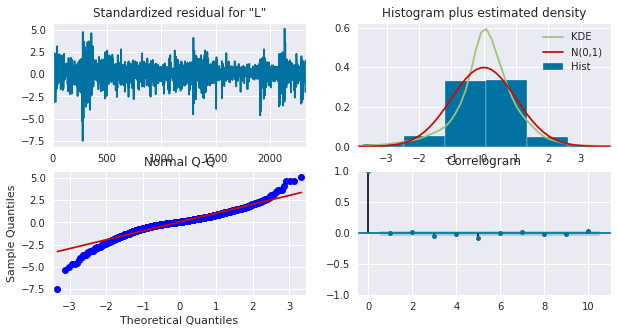

In [126]:
# Plot model residuals
_model_result.plot_diagnostics(figsize=(10, 5))
plt.show()

In [127]:
# Fit GARCH model with ARMA model residuals
_garch_model = arch_model(_model_result.resid, mean='Zero', p=1, q=1)
_garch_result = _garch_model.fit(disp = 'off')
print(_garch_result.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2785.44
Distribution:                  Normal   AIC:                           5576.89
Method:            Maximum Likelihood   BIC:                           5594.16
                                        No. Observations:                 2335
Date:                Sat, Jan 21 2023   Df Residuals:                     2335
Time:                        15:36:55   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0395  9.464e-03      4.175  2.978e-05 [2.

In [147]:
from arch.__future__ import reindexing

In [150]:
index = bitcoin_data.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}
for i in range(30):
    sys.stdout.write('-')
    sys.stdout.flush()
    res = _garch_model.fit(first_obs=start_loc + i, last_obs=i + end_loc, disp='off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print(' Done!')
variance_fixedwin = pd.DataFrame(forecasts).T

------------------------------ Done!


In [149]:
index = bitcoin_data.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}
for i in range(30):
    sys.stdout.write('-')
    sys.stdout.flush()
    res = _garch_model.fit(first_obs = start_loc, last_obs = i + end_loc, disp = 'off')
    temp = res.forecast(horizon=1).variance
    fcast = temp.iloc[i + end_loc - 1]
    forecasts[fcast.name] = fcast
print(' Done!')
variance_expandwin = pd.DataFrame(forecasts).T

------------------------------ Done!


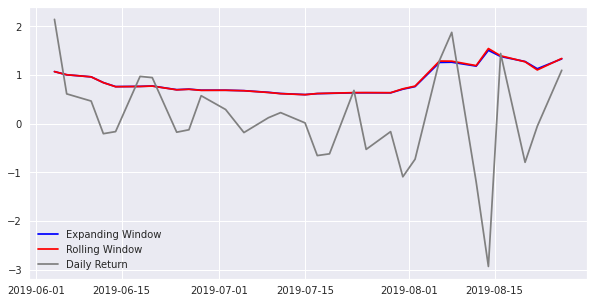

In [151]:
# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)

# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)

# Plot results
plt.figure(figsize=(10,5))

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue', label='Expanding Window')

# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red', label='Rolling Window')

plt.plot(sp_data.Return.loc[variance_expandwin.index], color = 'grey', label='Daily Return')

plt.legend()
plt.show()

In [139]:
from arch.__future__ import reindexing

In [140]:
index = bitcoin_data.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}

In [ ]:
for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a DataFrame    
forecast_var = pd.DataFrame(forecasts).T

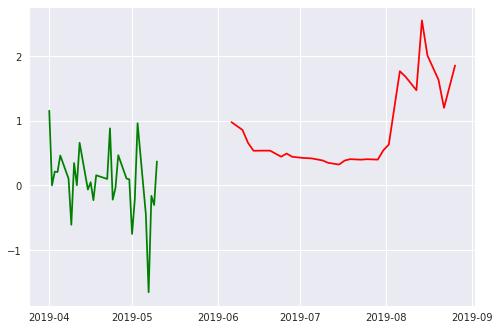

In [142]:
# Plot the forecast variance
plt.plot(forecast_var, color = 'red')
plt.plot(sp_data.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()

####**Comparez les résultats des prévisions**

+ ***Différentes approches de fenêtre glissante peuvent générer différents résultats de prévision. Dans cet exercice, regardons de plus près en comparant ces résultats prévisionnels***.

+ ***Tout d'abord, vous utiliserez un modèle GARCH pour prédire la volatilité du retour Bitcoin avec une fenêtre en expansion et une approche à fenêtre mobile fixe respectivement. Ensuite, vous tracerez les deux résultats de prévision ensemble pour visualiser la différence***.

+ *L'ensemble de données Bitcoin est préchargé dans bitcoin_data, et n'hésitez pas à explorer ses colonnes "Close" et "Return". La prévision de variance générée avec une approche de fenêtre en expansion est enregistrée dans variance_expandwin, et celle avec une approche de fenêtre mobile fixe est enregistrée dans variance_fixedwin.*

####**Instructions**
+ Imprimez les 5 premières lignes de prévision de variance stockées respectivement dans variance_expandwin et variance_fixedwin.
+ Calculez la volatilité à partir de la prévision de variance avec une fenêtre en expansion et une approche de fenêtre mobile fixe respectivement. 
+ Utilisez une fonction prédéfinie de numpy (importée en tant que np).
+ Tracez les deux prévisions de volatilité calculées à partir de l'étape précédente dans un seul graphique.

In [ ]:
index = bitcoin_data.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}
for i in range(30):
    sys.stdout.write('-')
    sys.stdout.flush()
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
print(' Done!')
variance_fixedwin = pd.DataFrame(forecasts).T

In [ ]:
index = bitcoin_data.index
start_loc = 0
end_loc = np.where(index >= '2020-1-1')[0].min()
forecasts = {}
for i in range(30):
    sys.stdout.write('-')
    sys.stdout.flush()
    gm_result = basic_gm.fit(first_obs = start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
print(' Done!')
variance_expandwin = pd.DataFrame(forecasts).T

            h.1
2019-06-04  NaN
2019-06-06  NaN
2019-06-10  NaN
2019-06-12  NaN
2019-06-14  NaN
                 h.1
2019-06-04       NaN
2019-06-06  0.980783
2019-06-10  0.859764
2019-06-12  0.660415
2019-06-14  0.537811


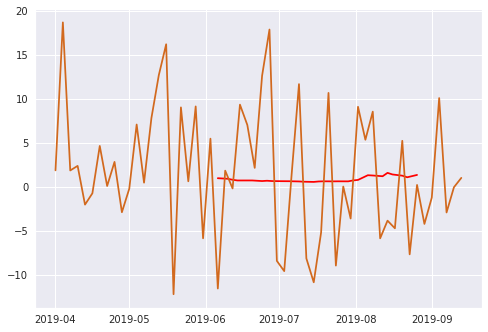

In [160]:
# Print header of variance forecasts with expanding and fixed window
print(variance_expandwin.head())
print(variance_fixedwin.head())

# Calculate volatility from variance forecast with an expanding window
vol_expandwin = np.sqrt(variance_expandwin)
# Calculate volatility from variance forecast with a fixed rolling window
vol_fixedwin = np.sqrt(variance_fixedwin)

# Plot volatility forecast with an expanding window
plt.plot(vol_expandwin, color = 'blue')
# Plot volatility forecast with a fixed rolling window
plt.plot(vol_fixedwin, color = 'red')
plt.plot(bitcoin_data.Return['2019-4-1':'2019-9-15'], color = 'chocolate')
plt.show()

###**Test de signification des paramètres du modèle**

####**1. Test de signification des paramètres du modèle**
+ ***Salut et bon retour! Auparavant, vous avez appris à spécifier des hypothèses pour définir des modèles GARCH plus réalistes et à faire de meilleures prévisions avec l’approche de la fenêtre glissante. Mais comment mesurer la performance du modèle et choisir un meilleur modèle ? Vous gagnerez en clarté après ce chapitre.***


####**2. Ai-je besoin de ce paramètre?**

+ ***Les modèles GARCH peuvent avoir beaucoup de paramètres, tels que omega, alpha, bêta pour les périodes de décalage de différence, lambda pour GJR-GARCH, EGARCH et ainsi de suite***. 

+ Une question valable est : 
  + ai-je besoin de ce paramètre ? 
  + Est-ce pertinent et aide à construire un meilleur modèle ? 
  + Ou est-il si proche de zéro que pouvons-nous le laisser de côté? 
  + Dans la modélisation de la science des données, et dans la recherche scientifique en général, nous devrions toujours suivre la règle « KISS », qui signifie « keep it simple stupid »!. 
  
+ En d’autres termes, choisissez les modèles parcimonieux plutôt que les modèles complexes. 

+ Le principe de parcimonie stipule que l’explication la plus simple d’un événement ou d’une observation est la préférée. 

+ Un modèle parcimonieux peut faire un bon travail en expliquant les données avec le nombre minimum de paramètres.

####**3. Test d’hypothèse**
+ **Nous pouvons utiliser un test d’hypothèse pour décider s’il faut conserver ou supprimer un paramètre de modèle**. 

+ **Le test d’hypothèse est un moyen statistique de vérifier une affirmation, également connue sous le nom d’hypothèse nulle ou H0, qui est faite à propos d’une population à l’aide des données de l’échantillon**. 
+ L’hypothèse alternative est celle que nous accepterions si l’hypothèse nulle est conclue comme fausse. 
+ Dans notre cas, l’hypothèse nulle est : une valeur de paramètre est égale à 0. Si H0 ne peut pas être rejeté, nous devrions laisser le paramètre en dehors du modèle GARCH.

####**4. Signification statistique**
+ Nous pouvons effectuer des tests de signification statistique pour déterminer s’il faut accepter ou rejeter l’hypothèse nulle. 
+ En règle générale, le niveau de signification est généralement fixé à 0,05, ce qui signifie que la probabilité d’observer les résultats de nos données par hasard n’est que de 5%.

####**5. Valeur de $p$**
+ À partir d’un test de signification statistique, nous pouvons obtenir la valeur de $p$, qui est utilisée pour comparer avec le niveau de signification prédéfini afin de décider de rejeter ou d’accepter l’hypothèse nulle. 

+ La valeur de $p$ est la valeur de probabilité d’obtenir les résultats observés d’un test, en supposant que l’hypothèse nulle est vraie. 

+ Cela nous indique quelles sont les chances que les résultats aient pu se produire par hasard. 

+ Plus la valeur de $p$ est basse, plus les preuves sont surprenantes, plus notre hypothèse nulle semble ridicule. 

+ En d’autres termes, rejetez l’hypothèse nulle si la valeur de $p$ est inférieure au niveau de signification spécifié, par exemple 5%.

####**6. Exemple de valeur de $p$**
+ Les valeurs $p$ du modèle GARCH peuvent être examinées dans le résumé du modèle. 
+ Nous pouvons également les obtenir directement en utilisant des « pvalues ».

####**7. $T$-statistique**
+ Une autre mesure du test de signification statistique est la statistique $t$. 

+ Il est calculé comme la valeur estimée du paramètre soustraite par sa valeur moyenne attendue, puis divisée par son erreur-type. 

+ Puisque notre hypothèse nulle suppose que la valeur moyenne du paramètre est nulle, il s’agit simplement du paramètre estimé divisé par l’erreur-type. 

+ La valeur absolue de la statistique $t$ est une mesure de distance, qui nous indique combien d’erreurs-types le paramètre estimé est éloigné de 0. 

+ Plus la distance est grande, plus le paramètre est susceptible de ne pas être nul. 

+ En règle générale, si la statistique $t$ est supérieure à 2, nous pouvons rejeter l’hypothèse nulle. En d’autres termes, le paramètre n’est pas susceptible d’être nul et doit être inclus dans le modèle.

####**8. Exemple de statistique $T$**
+ La statistique $t$ peut être visualisée dans le résumé de l’ajustement du modèle ou directement accessible avec « tvalues ». 

+ Il peut également être calculé en divisant les valeurs des paramètres par leurs erreurs types.

####**9. Entraînons-nous!**
+ Maintenant, c’est votre tour!

###**EXERCICE**

####**Restez simple stupide**
+ ***Une règle empirique pour la modélisation de la science des données est « KISS » (keep it simple stupid). En d’autres termes, choisissez toujours un modèle parcimonieux avec des paramètres pertinents. Il existe des tests statistiques et des mesures pour vous aider à décider.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**


+ ***Un modèle complexe est préféré à un modèle parcimonieux étant donné un pouvoir de prédiction comparable.***

+ Dans les tests d’hypothèses statistiques, la valeur de $p$ est la probabilité d’observer vos données si l’hypothèse nulle est vraie.

+ En règle générale, si la valeur absolue de la statistique $t$ est supérieure à 2, l’hypothèse nulle doit être rejetée.

+ 5 % est un seuil couramment utilisé pour mesurer le niveau d’importance.

*CONCLUSION*

***Bon appel! Selon la règle du « KISS », ou le « principe de parcimonie », l’explication la plus simple d’un événement ou d’une observation est celle à privilégier. Par conséquent, choisissez toujours un modèle parcimonieux plutôt qu’un modèle complexe étant donné un pouvoir de prédiction comparable.***

####**Simplifier le modèle avec des p-values**

+ ***Léonard de Vinci a dit un jour : "La simplicité est la sophistication ultime." Cela s'applique également à la modélisation de la science des données. Dans cet exercice, vous vous exercerez à utiliser les valeurs de p pour décider de la nécessité des paramètres de modèle et définirez un modèle parcimonieux sans paramètres insignifiants.***

+ ***L'hypothèse nulle est que la valeur du paramètre est zéro. Si la valeur de p est supérieure à un niveau de confiance donné, l'hypothèse nulle ne peut pas être rejetée, ce qui signifie que le paramètre n'est pas statistiquement significatif, donc pas nécessaire.***

+ *Un modèle GARCH a été défini et ajusté par les données de retour Bitcoin. Le résultat du modèle est enregistré dans gm_result.*

####**Instructions**
+ Imprimez le récapitulatif d'ajustement du modèle.
+ Obtenez les paramètres du modèle et les p-values, et enregistrez-les dans un DataFrame para_summary.
+ Imprimez et révisez para_summary.

####**Question**
+ D'après les valeurs de $p$, quel paramètre ci-dessous n'est pas statistiquement significatif avec un niveau de confiance de 5 % ?

####**Des réponses possibles**

+ oméga

+ alpha

+ ***gamma***

+ bêta

In [164]:
gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)

Iteration:      5,   Func. Count:     36,   Neg. LLF: 1398.24040902342
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1391.801000415574
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1391.8009984837186
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


In [165]:
# Print model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1391.80
Distribution:                  Normal   AIC:                           2791.60
Method:            Maximum Likelihood   BIC:                           2811.70
                                        No. Observations:                 1123
Date:                Sat, Jan 21 2023   Df Residuals:                     1122
Time:                        16:26:55   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0825  2.228e-02      3.703  2.134e-04 [3.883e-0

In [166]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

          parameter        p-value
mu         0.082501   2.134417e-04
omega      0.044309   3.713867e-05
alpha[1]   0.148759   1.116453e-05
beta[1]    0.800212  1.514096e-124


*CONCLUSION*

***Travail incroyable! Sa valeur $p$ est supérieure à 0,05, de sorte que l'hypnose nulle affirmant que la valeur du paramètre est zéro ne peut pas être rejetée. Dans ce cas, un modèle GARCH asymétrique semble exagéré.***

####**Simplifier le modèle avec des statistiques $t$**
+ ***Outre les valeurs $p$, les statistiques $t$ peuvent également aider à décider de la nécessité des paramètres du modèle.*** 

+ Dans cet exercice, vous vous exercerez à utiliser les statistiques $t$ pour évaluer la signification des paramètres du modèle.

+ *La statistique $t$ est calculée comme la valeur estimée du paramètre soustraite de sa moyenne attendue (zéro dans ce cas) et divisée par son erreur standard. La valeur absolue de la statistique t est une mesure de distance, qui vous indique combien d'erreurs standard le paramètre estimé est éloigné de 0. En règle générale, si la statistique t est supérieure à 2, vous pouvez rejeter l'hypothèse nulle. .*

+ *Vous travaillerez avec le même modèle GARCH que l'exercice précédent. Vous pouvez accéder au résumé de l'ajustement du modèle dans gm_result*.

####**Instructions**
+ Obtenez les paramètres du modèle, les erreurs standard et la statistique $t$, et enregistrez-les dans le DataFrame para_summary.
+ Calculez manuellement les statistiques $t$ à l'aide des valeurs des paramètres et de leurs erreurs standard, puis enregistrez le résultat du calcul dans calculate_t.
+ Imprimez et révisez calculate_t.
+ Imprimez et révisez para_summary.

In [167]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-value by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-statistic
print(calculated_t)

mu           3.702552
omega        4.124596
alpha[1]     4.393295
beta[1]     23.736519
dtype: float64


In [168]:
# Print parameter stats
print(para_summary)

          parameter   std-err    t-value
mu         0.082501  0.022282   3.702552
omega      0.044309  0.010743   4.124596
alpha[1]   0.148759  0.033860   4.393295
beta[1]    0.800212  0.033712  23.736519


*CONCLUSION*

***Travail formidable! Les statistiques $t$ sont en accord avec les valeurs $p$, soulignant que le paramètre gamma n'est pas statistiquement significatif et doit être exclu du modèle.***

###**Validation des hypothèses du modèle GARCH**

####**1. Validation des hypothèses du modèle GARCH**
+ ***Les modèles GARCH font des hypothèses strictes sur les caractéristiques de distribution de leurs résidus standardisés. Si le modèle explique bien les données, les résidus normalisés doivent ressembler à un processus de bruit blanc, qui ne présente pas de regroupement de données ou d’autocorrélation. Dans cette leçon, apprenons à vérifier cela.***

####**2. Contrôle visuel**
+ Pour commencer, nous pouvons faire une vérification visuelle en traçant les résidus standardisés. 

+ Comme le montrent les graphiques, les données brutes de retour présentent des signes évidents de regroupement. 

+ Après ajustement des modèles GARCH, les résidus standardisés ne montrent pas beaucoup de regroupement et sont proches d’un mouvement aléatoire de bruit blanc.

####**3. Autocorrélation**


+ ***Nous pouvons également utiliser l’autocorrélation pour détecter le caractère non aléatoire dans les résidus standardisés***. 

+ ***L’autocorrélation décrit la corrélation d’une variable avec elle-même étant donné un décalage temporel***. 

+ ***Lorsqu’il existe un modèle tel que les valeurs de la série chronologique peuvent être prédites en fonction des valeurs précédentes de la série, les données présentent une autocorrélation***. 

+ ***L’existence d’une autocorrélation dans les résidus normalisés indique que le modèle n’est peut-être pas solide. Nous pouvons utiliser des graphiques ACF ou des tests statistiques tels que Ljung-Box pour détecter des autocorrélations dans les données***.

####**4. Parcelle ACF**
+ ***Le coefficient de corrélation entre deux valeurs d’une série chronologique est appelé fonction d’autocorrélation ou ACF.*** 

+ Par exemple, une autocorrélation décalée 1 est la corrélation entre des valeurs distantes d’une période. 

+ Plus généralement, **une autocorrélation de décalage $k$ est la corrélation entre des valeurs séparées par $k$ périodes**. 

+ ***Un diagramme ACF est une représentation visuelle des corrélations entre différents décalages***. 

+ Comme le montre le graphique, au décalage 0, la corrélation est de 1 car les données sont parfaitement corrélées avec elles-mêmes. 

+ En se déplaçant le long de l’axe des abscisses, le graphique montre des corrélations de différents décalages. 

+ Nous pouvons également spécifier un niveau de confiance à l’aide de l’alpha. 

+ Par exemple, un alpha du point 05 signifie qu’il y a 5% de chances que la corrélation tombe en dehors de la bande, même si la corrélation réelle est nulle.

####**5. Tracé ACF en Python**
+ ***Nous pouvons facilement générer un tracé ACF avec la fonction Python « plot_acf() à partir du paquet « statsmodels ».*** 

+ ***Spécifiez l’alpha dans la fonction pour définir explicitement un niveau de confiance, puis les intervalles de confiance correspondants seront tracés***.

####**6. Test Ljung-Box**

+ ***Le test de Ljung-Box, nommé d’après Greta Ljung et George Box, est un test statistique permettant de déterminer si l’une des autocorrélations d’un groupe d’une série chronologique est différente de zéro***. 

+ ***Au lieu de tester le caractère aléatoire à chaque décalage distinct, il teste le caractère aléatoire « global » en fonction d’un certain nombre de décalages***. 

+ ***L’hypothèse nulle du test de Ljung-Box est la suivante: les données sont distribuées indépendamment. Rappelons que nous rejetons l’hypothèse nulle si la valeur de p est inférieure au niveau de signification spécifié, par exemple 5%. En d’autres termes, une valeur de $p$ inférieure à 5 % indique que les résidus ne sont pas distribués indépendamment, de sorte que le modèle n’est pas adéquat.***

####**7. Test Ljung-Box Python**

+ ***Nous pouvons utiliser la fonction « acorr_ljungbox() » fournie dans le package « statsmodels » pour effectuer un test Ljung-Box. Utilisez des « décalages » pour définir le nombre maximal de décalages jusqu’à ce que le test soit effectué.*** 

+ À partir des résultats des tests, les valeurs $p$ peuvent être visualisées à partir de la deuxième ligne des résultats.

####**8. Entraînons-nous!**
+ Maintenant, c’est votre tour!

###**EXERCICE**

####**Détecter les autocorrélations**

+ ***Les modèles GARCH font des hypothèses strictes sur les caractéristiques de distribution des résidus standardisés. Si le modèle explique bien les données, les résidus normalisés ne doivent pas présenter de regroupement de données ou d'autocorrélations***.

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Répondre à la question**


+ Idéalement, le résidu standardisé d'un modèle GARCH devrait ressembler à un processus de bruit blanc.

+ L'autocorrélation est la corrélation d'une série chronologique avec une copie retardée d'elle-même en fonction des décalages temporels.

+ Un tracé ACF est une représentation visuelle des autocorrélations basées sur différents décalages temporels.


+ ***Si la valeur de $p$ d'un test de Ljung-Box est inférieure au niveau de signification spécifié, cela indique que les données sont distribuées de manière indépendante***.

*CONCLUSION*

***Bien fait! Au contraire, une très petite valeur de $p$ permet de rejeter l'hypothèse nulle. C'est rejeter l'affirmation selon laquelle les données sont distribuées de manière indépendante.***

####**Tracé ACF**


+ **Si un modèle GARCH fait du bon travail, les résidus standardisés ne doivent pas présenter d'autocorrélations. Dans cet exercice, vous vous exercerez à utiliser un tracé ACF pour détecter les autocorrélations dans les données.**

+ ***Le coefficient de corrélation entre deux valeurs dans une série temporelle est appelé la fonction d'autocorrélation (ACF), et un tracé ACF est une représentation visuelle des corrélations entre différents décalages. Il existe des fonctions prédéfinies dans les packages Python statsmodels qui vous permettent de générer facilement des tracés ACF.***

+ *Un modèle GARCH a été ajusté avec les données de rendement du S&P 500, et ses résidus standardisés ont été calculés et enregistrés dans std_resid. Le matplotlib.pyplot a été importé en tant que plt.*

####**Instructions**
+ Importez le module nécessaire pour les tracés ACF à partir du package statsmodels.
+ Tracez les résidus standardisés du modèle GARCH enregistrés dans std_resid.
+ Générez un graphique ACF des résidus standardisés et définissez le niveau de confiance sur 0,05.

In [171]:
# Obtain model estimated residuals and volatility
resid = gm_result.resid
std = gm_result.conditional_volatility

# Calculate the standardized residuals
std_resid = gm_resid /gm_std

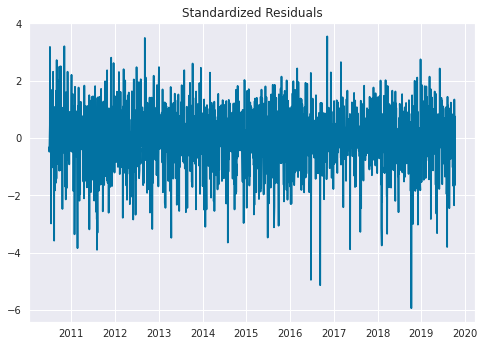

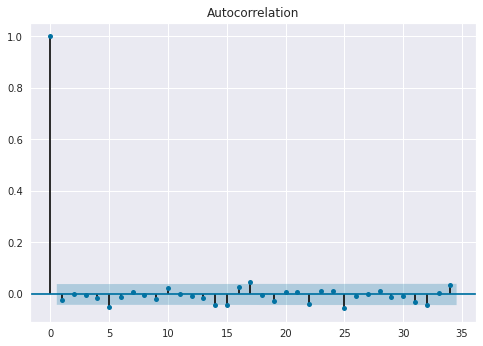

In [172]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf

# Plot the standardized residuals
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
plot_acf(std_resid, alpha = 0.05)
plt.show()

*CONCLUSION*

***Excellent travail! Le graphique ACF montre que la majorité des points de données se situent dans l'intervalle de confiance, de sorte que le modèle fait un travail décent.***

####**Test de Ljung-Box**


+ ***Un autre outil puissant pour vérifier les autocorrélations dans les données est le test de Ljung-Box. Dans cet exercice, vous vous entraînerez à détecter l'autocorrélation dans les résidus standardisés en effectuant un test de Ljung-Box.***

+ ***L'hypothèse nulle du test de Ljung-Box est : les données sont indépendamment distribuées. Si la valeur de p est supérieure au niveau de signification spécifié, l'hypothèse nulle ne peut pas être rejetée. En d'autres termes, il n'y a pas de signe clair d'autocorrélations et le modèle est valide.***

+ Vous utiliserez le même modèle GARCH que l'exercice précédent. Ses résidus normalisés sont enregistrés dans std_resid.

####**Instructions**
+ Importez le module nécessaire aux tests Ljung-Box depuis le package statsmodels.
+ Effectuez un test de Ljung-Box jusqu'au décalage 10 et enregistrez le résultat dans lb_test.
+ Imprimez et examinez les valeurs p du résultat du test Ljung-Box.

In [174]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(std_resid , lags = 10, return_df = True)

In [175]:
# Print the p-values
print('P-values are: ', lb_test.iloc[0,1])

P-values are:  0.23421339583994125



*CONCLUSION*

***Travail fantastique! Toutes les valeurs de p sont supérieures à 5 %, de sorte que l'hypothèse nulle ne peut pas être rejetée. En d'autres termes, aucune autocorrélation détectée et le modèle fait un travail décent.***

In [181]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(std_resid , lags = 10, return_df = False)

# Store p-values in DataFrame
df = pd.DataFrame({'P-values': lb_test[1]}).T

# Create column names for each lag
col_num = df.shape[1]
col_names = ['lag_'+str(num) for num in list(range(1,col_num+1,1))]

# Display the p-values
df.columns = col_names
df

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
P-values,0.234213,0.49214,0.689756,0.721303,0.167507,0.226825,0.305618,0.396772,0.405067,0.390765


###**Mesures de qualité de l’ajustement**

####**1. Mesures de qualité de l’ajustement**

+ ***Dans cette leçon, nous discuterons du concept de « qualité de l’ajustement » et de la façon de le mesurer.***

####**2. Qualité de l’ajustement**

+ Comme son nom l’indique, la « qualité de l’ajustement » décrit à quel point un modèle correspond à un ensemble d’observations. 

+ ***Les mesures de la qualité de l’ajustement résument généralement les écarts entre les valeurs observées et les valeurs estimées par le modèle***. 

+ ***Il existe de nombreuses méthodes pour mesurer la « qualité de l’ajustement »***. 

+ ***Plus précisément, nous discuterons de la méthode du maximum de vraisemblance et des critères d’information.***

####**3. Probabilité maximale**

+ ***Les modèles GARCH utilisent la « méthode du maximum de vraisemblance » pour estimer les paramètres***. 

+ ***L’estimation du maximum de vraisemblance est une méthode d’estimation des paramètres du modèle en maximisant la fonction de vraisemblance, de sorte qu’elle maximise la probabilité, ou la probabilité, d’obtenir les données que nous avons observées dans le cadre du modèle supposé***.

####**4. Log-likelihood en Python**
+ ***Les valeurs log-vraisemblance du modèle GARCH peuvent être examinées dans le résumé du modèle***. 

+ ***Nous pouvons également obtenir la valeur directement en utilisant « loglikelihood »***.

####**5. Surajustement**
+ **Le surajustement se produit lorsqu’un modèle apprend les détails et les bruits dans les données d’apprentissage, ou dans les données de l’échantillon, dans la mesure où cela a un impact négatif sur les performances du modèle sur de nouvelles données ou des données hors échantillon**. 

+ **En d’autres termes, le bruit ou les fluctuations aléatoires dans les données de l’échantillon sont captés et appris sous forme de modèles par le modèle, ce qui ne s’applique pas aux nouvelles informations. Le surajustement résulte généralement de la création d’un modèle trop complexe pour expliquer les idiosyncrasies dans les données étudiées.**

####**6. Critères d’information**

+ **Les critères d’information visent à mesurer le compromis entre la qualité de l’ajustement et la complexité du modèle**. 

+ Lors de l’ajustement de modèles, il est possible d’augmenter la probabilité en ajoutant des paramètres, mais cela peut entraîner un surajustement. 

+ **Les critères d’information tiennent compte de la probabilité du modèle, mais ajoutent également des pénalités pour la complexité du modèle**. 

+ **Un modèle avec plus de paramètres aura un score de critères d’information plus élevé étant donné les mêmes valeurs de vraisemblance**. 

+ ***AIC et BIC sont deux critères d’information couramment utilisés. AIC signifie « Akaike information criterion », et est nommé d’après le statisticien Akaike qui l’a formulé***. 

+ ***BIC signifie « Bayesian information criterion », et est assez similaire à AIC***. 

+ ***Ils sont tous deux utilisés dans le contexte de la sélection des modèles, et les modèles avec des scores AIC ou BIC relativement inférieurs sont préférés***.

####**7. AIC contre BIC**
+ ***Quelle est la différence entre AIC et BIC, vous pouvez demander. En général, leurs résultats concordent les uns avec les autres, et les modèles avec l’AIC ou le BIC le plus bas sont préférés***. 

+ ***La principale différence entre AIC et BIC est l’ampleur de la pénalité pour la complexité du modèle. BIC impose des pénalités plus importantes aux modèles avec plus de paramètres, et conduit à choisir des modèles plus parcimonieux que l’AIC***.

####**8. AIC/BIC en Python**

+ Les valeurs AIC et BIC du modèle GARCH peuvent être examinées dans le résumé du modèle. 

+ Nous pouvons également les obtenir directement en utilisant respectivement « aic » et « bic ».

####**9. Entraînons-nous!**
+ Maintenant, mettons en pratique ce que vous venez d’apprendre!

###**EXERCICE**

####**Qualité des bases de l’ajustement**

+ ***Le modèle peut-il expliquer les données ? En d’autres termes, qu’est-ce que la « bonté de l’ajustement »?***

+ ***La « qualité de l’ajustement » décrit dans quelle mesure le modèle correspond à un ensemble d’observations. Les mesures de la « qualité de l’ajustement » résument généralement l’écart entre les valeurs observées et les valeurs estimées par le modèle. Les mesures courantes comprennent les critères de probabilité maximale et d’information.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**

+ Rendre un modèle trop complexe a tendance à surajuster les données.

+ ***Plus l’AIC est grand, meilleur est le modèle.***


+ Plus la probabilité est grande, meilleur est le modèle.

*CONCLUSION*

***Bon appel! L’AIC impose des pénalités sur la complexité du modèle. Un modèle avec plus de paramètres aura un score de critère d’information plus élevé étant donné les mêmes valeurs de vraisemblance. Par conséquent, plus l’AIC est petit, meilleur est le modèle.***

####**Choisissez un gagnant en fonction de la log-vraisemblance**


+ Dans cet exercice, vous vous entraînerez à utiliser la log-vraisemblance pour choisir un modèle avec le meilleur ajustement.

+ ***Les modèles GARCH utilisent la méthode du maximum de vraisemblance pour estimer les paramètres. En général, plus le log-vraisemblance est grand, meilleur est le modèle car il implique une plus grande probabilité d'avoir observé les données que vous avez obtenues.***

+ *Deux modèles GARCH avec des hypothèses de distribution différentes ont été définis et ajustés avec les données de rendement du S&P 500. La distribution normale GARCH est enregistrée dans normal_result, et la distribution t asymétrique de Student GARCH est enregistrée dans skewt_result.*

####**Instructions**
+ Imprimez et examinez les résumés d'ajustement du modèle dans normal_result et skewt_result respectivement.
+ Imprimez le log-vraisemblance dans normal_result et skewt_result respectivement.

####**Question**
+ *Quel modèle est le meilleur selon leurs valeurs de log-vraisemblance ?*

####**Des réponses possibles**

+ GARCH normal

+ ***Skewt GARCH***

In [183]:
# Print normal GARCH model summary
print( gm_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1391.80
Distribution:                  Normal   AIC:                           2791.60
Method:            Maximum Likelihood   BIC:                           2811.70
                                        No. Observations:                 1123
Date:                Sat, Jan 21 2023   Df Residuals:                     1122
Time:                        16:26:55   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0825  2.228e-02      3.703  2.134e-04 [3.883e-0

In [184]:
# Print the log-likelihood of normal GARCH
print('Log-likelihood of normal GARCH :', gm_result.loglikelihood)
# Print the log-likelihood of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

Log-likelihood of normal GARCH : -1391.8009984837186
Log-likelihood of skewt GARCH : -2689.9795443769394


*CONCLUSION*

***Merveilleux travail! Le modèle GARCH avec l'hypothèse de distribution $t$ de Student asymétrique a une log-vraisemblance plus élevée, donc est relativement meilleur.***

####**Choisissez un gagnant en fonction de l'AIC/BIC**


+ Dans cet exercice, vous vous entraînerez à utiliser des critères d'information pour choisir un modèle avec le meilleur ajustement.

+ **Les critères d'information visent à mesurer le compromis entre la qualité de l'ajustement et la complexité du modèle. AIC et BIC sont deux critères d'information couramment utilisés pour la sélection de modèles. Ils imposent tous deux des pénalités aux modèles avec plus de paramètres ou aux modèles plus complexes. Plus l'AIC ou le BIC est faible, meilleur est le modèle.**

+ *Un modèle GJR-GARCH et un modèle EGARCH ont été définis et ajustés avec les données de rendement du S&P 500. Leurs résultats sont accessibles respectivement dans gjrgm_result et egarch_result.*

####**Instructions**
+ Imprimez l'AIC dans gjrgm_result et egarch_result respectivement.
+ Imprimez le BIC dans gjrgm_result et egarch_result respectivement.

####**Question**
+ *Quel modèle est le meilleur selon leurs valeurs AIC/BIC ?*

####**Des réponses possibles**

+ GJR-GARCH

+ ***EGARCH***


In [185]:
# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

AIC of GJR-GARCH model : 9703.795750203499
AIC of EGARCH model : 9688.926237865046


In [186]:
# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

BIC of GJR-GARCH model : 9735.512900491713
BIC of EGARCH model : 9720.64338815326


*CONCLUSION*

***Travail incroyable! L'AIC et le BIC du modèle EGARCH sont tous deux inférieurs, donc EGARCH est relativement meilleur.***

###**Backtesting du modèle GARCH**

####**1. Backtesting du modèle GARCH**
+ **Dans cette leçon, voyons comment nous pouvons utiliser le backtesting comme outil pratique pour évaluer les performances du modèle, et comment quantifier et comparer les résultats du backtesting.**

####**2. Backtesting**

+ **Le backtesting est une méthode permettant d’évaluer la qualité d’une prévision de modèle**. 

+ **Nous comparons les résultats prédits du modèle avec les données historiques réelles pour voir à quel point ils sont proches**. 

+ **Un résultat de backtesting satisfaisant nous donnera plus confiance dans la fiabilité des prédictions du modèle**.

####**3. Dans l’échantillon ou hors échantillon**

+ *Typiquement, nous pouvons séparer toutes les données historiques que nous avons sous la main en deux parties*. 

+ ***Les données dites « dans l’échantillon » sont utilisées pour l’ajustement de la modélisation, et les données « hors échantillon » sont réservées au backtesting pour évaluer les performances du modèle***.

####**4. MAE**

+ Nous pouvons utiliser MAE pour mesurer les résultats des backtests. 

+ MAE signifie « Mean Absolute Error ». 

+ ***Comme le montre son équation, il s’agit de la moyenne des erreurs absolues entre les prédictions et les données réelles***. 

+ ***Relativement, plus le MAE est petit, meilleures sont les performances du modèle***.

####**5. MPE**

+ ***Une autre mesure des résultats de backtesting est MSE, qui signifie « Mean Squared Error »***. 

+ ***Il s’agit de la différence quadratique moyenne entre les valeurs estimées et les valeurs réelles***. 

+ ***Nous voulons minimiser les erreurs de prédiction. Donc, comme le MAE, plus le MSE est petit, meilleures sont les performances du modèle.***

####**6. Calculer MAE, MSE en Python**

+ Nous pouvons facilement calculer les erreurs de prédiction avec des fonctions prédéfinies dans le package « sklearn.metrics ». 

+ ***Appelez « mean_absolute_error() » pour calculer MAE, et « mean_squared_error() » pour calculer MSE***. 

+ Transmettez les données réelles et les prédictions du modèle en tant que paramètres.

####**7. Entraînons-nous!**
+ Maintenant, c’est votre tour. Bonne pratique!

###**EXERCICE**

####**Principes de base du backtesting**


+ ***Le backtesting est une approche courante pour évaluer les performances du modèle ex post. « Ex post » signifie « après le fait ». Au cours d’un backtesting, les prévisions du modèle sont comparées aux données historiques réelles pour voir dans quelle mesure le modèle aurait fonctionné.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**

+ Les données « hors échantillon » sont réservées aux backtesting.

+ ***Plus le MAE et le MSE sont grands, meilleures sont les performances du modèle.***

+ Il existe des fonctions prédéfinies pour calculer les erreurs de prédiction de modèle telles que MAE et MSE dans le package Python sklearn.metrics.

####**Bon appel! MAE et MSE sont tous deux des mesures des erreurs de prédiction du modèle.**

+ **Vous souhaitez minimiser les erreurs de prédiction. Ainsi, plus elles sont petites, meilleures sont les performances du modèle.**

+ *Backtesting avec MAE, MSE*

+ *Dans cet exercice, vous vous exercerez à évaluer les performances d'un modèle en effectuant des backtestings. La précision de la prévision hors échantillon est évaluée en calculant la MSE et la MAE.*

+ *Vous pouvez facilement estimer les erreurs de prédiction MSE et MAE avec des fonctions prédéfinies dans le package sklearn.metrics. La variance réelle et la variance prédite ont été préchargées respectivement dans actual_var et forecast_var.*

####**Instructions**
+ Dans evaluate(), effectuez le calcul MAE en appelant la fonction correspondante à partir de sklean.metrics.
+ Dans evaluate(), effectuez le calcul MSE en appelant la fonction correspondante à partir de sklean.metrics.
+ Passez des variables à evaluate() afin d'effectuer le backtest.

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [188]:
def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

# Backtest model with MAE, MSE
#evaluate(actual_var, forecast_var)

In [189]:
# Backtest model with MAE, MSE
evaluate(bitcoin_data['Return'].sub(bitcoin_data['Return'].mean()).pow(2), egarch_vol**2)

Mean Absolute Error (MAE): 97.7
Mean Squared Error (MSE): 7.44e+04


(97.68974786355913, 74414.89490289199)

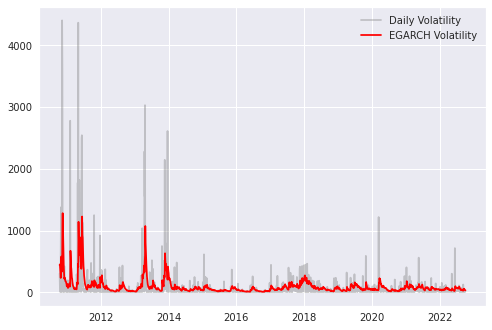

In [190]:
# Plot the actual Bitcoin volatility
plt.plot(bitcoin_data['Return'].sub(bitcoin_data['Return'].mean()).pow(2), 
         color = 'grey', alpha = 0.4, label = 'Daily Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol**2, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()

*CONCLUSION*

***Excellent travail jusqu'ici ! Remarque MSE est généralement plus grand que MAE en raison de l'effet au carré. Dans le chapitre suivant, explorons quelques applications pratiques du modèle GARCH dans le monde financier !***

###**La VaR dans la gestion des risques financiers**

####**1. La VaR dans la gestion des risques financiers**

+ **Bonjour et bon retour. De grands progrès ! Jusqu’à présent, vous avez appris à définir des modèles GARCH réalistes, à faire des prévisions et à évaluer les performances des modèles. Dans ce dernier chapitre du cours, nous discuterons de certaines applications pratiques des modèles GARCH dans le monde financier. Commençons par la VaR dans la gestion des risques.**

####**2. Mentalité de gestion des risques**

+ En ce qui concerne l’investissement financier, Warren Buffett a dit un jour : 

  + **Règle numéro 1** : Ne perdez jamais d’argent. 
  + **Règle numéro 2** : N’oubliez jamais la règle numéro 1. 
  
+ Bien sûr, il est irréaliste de ne jamais perdre d’argent. 

+ Mais ce à quoi Buffett faisait référence était l’état d’esprit d’un investisseur raisonnable. 

+ N’allez pas dans un investissement avec une attitude cavalière qu’il est normal de perdre. 

+ Soyez toujours préparé et informé. Les investisseurs qui réussissent ne négligent pas l’importance de la gestion des risques. Ils sont toujours conscients du risque de baisse.

####**3. Qu’est-ce que la VaR**
+ **VaR signifie « Value at Risk » (valeur à risque)**. 

+ **C’est un concept important dans la gestion des risques de quantifier les pertes potentielles**. 

+ La VaR est toujours discutée avec trois ingrédients: 
  + **un portefeuille**, 
  + **un horizon temporel** 
  + **et une probabilité**. 
  
+ **La valeur de la VaR indique que, compte tenu d’un horizon temporel, le portefeuille est susceptible de perdre au moins autant d’argent compte tenu d’une probabilité spécifiée**.

####**4. Exemples de VaR**

+ Par exemple, une VaR de 5% sur 1 jour d’un million de dollars signifie qu’il y a une probabilité de 5% que la valeur du portefeuille diminue de 1 million de dollars ou plus sur une période de 1 jour. 
+ De même, une VaR de 1 % sur 10 jours de 9 millions de dollars signifie qu’il y a une probabilité de 1 % que la valeur du portefeuille diminue de 9 millions de dollars ou plus sur une période de 10 jours. 
+ Cela peut également être formulé comme suit : 
  + sur une période de 10 jours, il y a une probabilité de 99 % que le portefeuille perde moins de 9 millions de dollars.

####**5. VaR dans la gestion des risques**

+ ***Dans la gestion des risques financiers, la VaR est conçue pour évaluer les pertes potentielles du portefeuille et fixer des limites de risque***. 

+ ***Lorsque la perte du portefeuille dépasse la VaR, on parle de dépassement de la VaR***. 

+ Dans le graphique, les rendements tracés par des points orange entourés de noir sont des exemples de dépassement de la VaR, puisqu’ils sont tombés en dessous de la ligne de seuil de VaR en rouge. 

+ Supposons une VaR quotidienne de 5% et 250 jours de bourse dans une année, un modèle de VaR valide devrait avoir moins de 13 dépassements de VaR en un an, soit 5% fois 250. S’il y a plus de dépassements, le modèle sous-estime le risque.

####**6. VaR dynamique avec GARCH**
+ **Pendant la crise financière, les grappes de volatilité et les pertes ont tendance à se produire plusieurs jours de suite.** 

+ **Les modèles GARCH intègrent la caractéristique de volatilité variant dans le temps, ce qui nous permet de faire une estimation plus réaliste de la VaR**. 

+ **La VaR peut être calculée comme le rendement moyen attendu du portefeuille plus un quantile multiplié par la volatilité du portefeuille**. 

+ Le quantile dépend d’un niveau de confiance choisi, disons 95% ou 99%. 

+ **La moyenne et la volatilité attendues du portefeuille peuvent être obtenues à partir des prévisions du modèle GARCH**. 

+ **Notez que nous obtenons des prévisions de variance directement à partir du modèle GARCH, nous devons donc calculer sa racine carrée avant de brancher le calcul de la VaR**.

####**7. Calcul dynamique de la VaR**
+ Voici comment estimer la VaR dynamique étape par étape. 
+ **Etape 1: La VaR est tournée vers l’avenir, nous ajustons donc d’abord un modèle GARCH et l’utilisons pour faire des prévisions de variance.**

####**8. Calcul dynamique de la VaR (suite)**
+ **Etape 2 : consiste à obtenir la moyenne prospective et la volatilité à partir des prévisions**. 

+ **Etape 3 : consiste à obtenir le quantile en fonction d’un niveau de confiance donné**. 

+ **Avec GARCH, le quantile peut être estimé paramétriquement avec une distribution supposée, ou empiriquement en utilisant des données historiques**. 

+ **Discutons ensuite de la VaR paramétrique et de l’approche empirique de la VaR une par une**.

####**9. VaR paramétrique**


+ **La VaR paramétrique avec GARCH est estimée à l’aide de quantiles d’une approche paramétrique**. 

+ **C’est-à-dire qu’il est basé sur la distribution supposée GARCH des résidus standardisés**. 

+ Le code Python montre comment l’implémenter.

####**10. VaR empirique**

+ **La VaR empirique avec GARCH est estimée avec une approche empirique**. 

+ **C’est-à-dire qu’il est basé sur la distribution observée des résidus standardisés GARCH**. 

+ Le code Python montre comment l’implémenter.

####**11. Entraînons-nous!**
+ C’est beaucoup à digérer. Entraînons-nous!

###**EXERCICE**

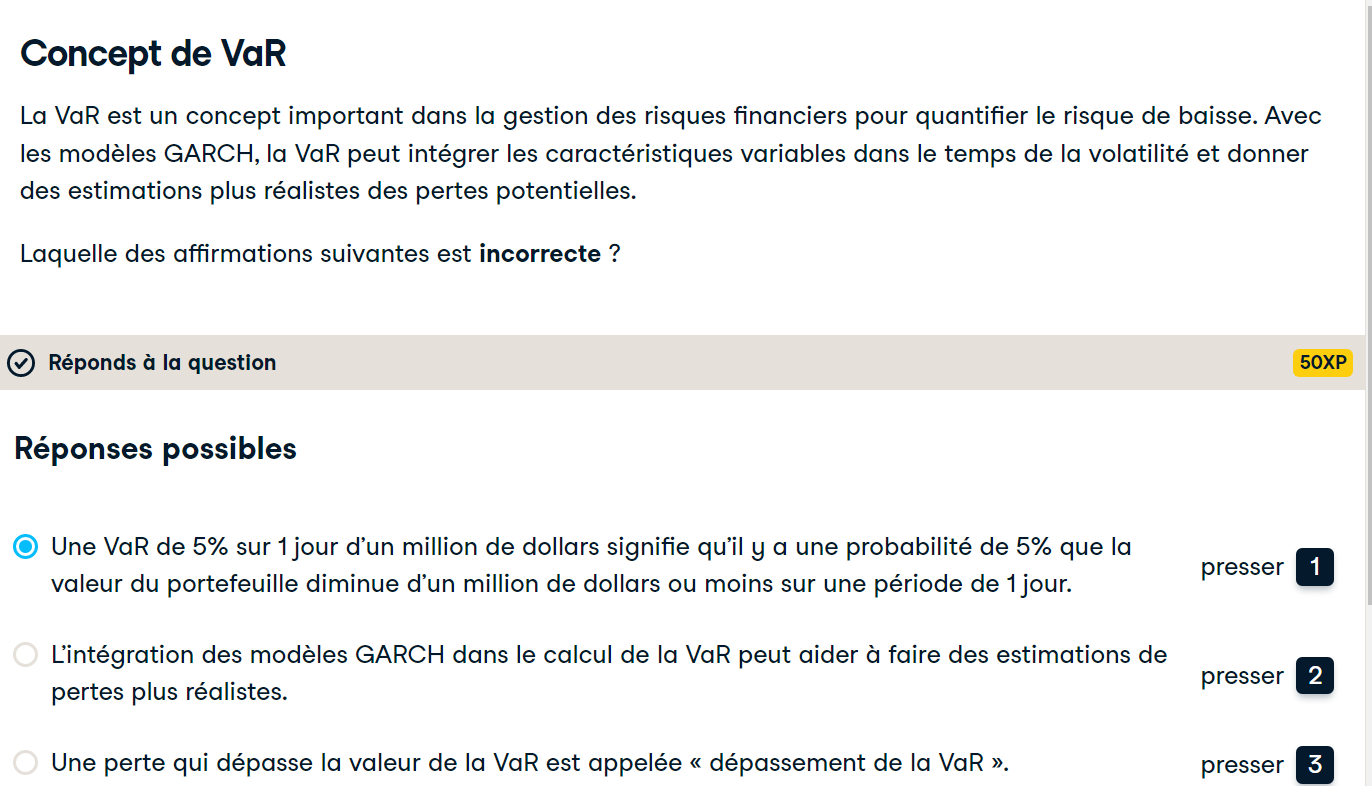

*CONCLUSION*

***Excellent travail! La VaR de 5% sur 1 jour d’un million de dollars signifie qu’il y a une probabilité de 5% que la valeur du portefeuille diminue de 1 million de dollars ou PLUS, pas moins, sur une période de 1 jour.***


####**Calculer la VaR paramétrique**
+ Dans cet exercice, vous vous entraînerez à estimer des VaR quotidiennes dynamiques de 5 % avec une approche paramétrique.

+ **Rappelons qu'il y a trois étapes pour effectuer une estimation de la VaR directe. L'étape 1 consiste à utiliser un modèle GARCH pour faire des prévisions de variance. L'étape 2 consiste à obtenir la moyenne prospective et la volatilité GARCH. Et l'étape 3 consiste à calculer le quantile selon un niveau de confiance donné. L'approche paramétrique estime les quantiles à partir d'une hypothèse de distribution supposée.**

+ *Un modèle GARCH a été équipé de données de retour Bitcoin historiques jusqu'au 01/01/2019, puis il a généré des prévisions de moyenne et de variance, enregistrées respectivement dans mean_forecast et variance_forecast. Le modèle GARCH suppose une distribution $t$ de Student, et sa $\nu$ (degré de liberté) est enregistré dans nu.*

####**Instructions**
+ Calculez 0,05 quantile à partir de la distribution $t$ de Student supposée.
+ Calculez la VaR en utilisant la moyenne_prévision, la variance_prévision du modèle GARCH et le quantile de l'étape précédente.

In [211]:
basic_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
res = basic_gm.fit(disp='off', last_obs='2020-01-01')

In [205]:
forecasts = res.forecast(start='2019-01-01')
cond_mean = forecasts.mean['2019':]
cond_var = forecasts.variance['2019':]
q = basic_gm.distribution.ppf([0.01, 0.05], res.params[5])
print(q)

[-2.64354388 -1.39860001]


In [ ]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=['1%', '5%'], index=cond_var.index)
value_at_risk.describe()

In [225]:
# Obtain the parametric quantile
forecasts = res.forecast(start='2019-01-01')
mean_forecast = forecasts.mean['2019':]
variance_forecast = forecasts.variance['2019':]
q_parametric = basic_gm.distribution.ppf([0.05], res.params[5])
print('5% parametric quantile: ', q_parametric)
  

5% parametric quantile:  [-1.39860001]


In [226]:
# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric[None, :]

In [227]:
# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['5%'], index = variance_forecast.index)

In [228]:
VaR_parametric.describe()

,5%
count,459.000000
mean,-10.292188
std,3.074878
min,-22.320187
25%,-12.137388
50%,-9.689535
75%,-8.207741
max,-4.480232


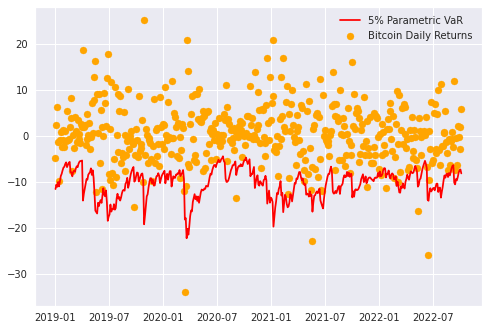

In [229]:
# Plot the VaR
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

In [231]:
# Obtain the parametric quantile
forecasts = res.forecast(start='2019-01-01')
mean_forecast = forecasts.mean['2019':]
variance_forecast = forecasts.variance['2019':]
q_parametric = basic_gm.distribution.ppf([0.01, 0.05], res.params[5])
print('5% parametric quantile: ', q_parametric)

5% parametric quantile:  [-2.64354388 -1.39860001]


In [232]:
# Calculate the VaR
VaR_parametric = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric[None, :]
# Save VaR in a DataFrame
VaR_parametric = pd.DataFrame(VaR_parametric, columns = ['1%', '5%'], index = variance_forecast.index)
VaR_parametric.describe()

,1%,5%
count,459.000000,459.000000
mean,-19.884046,-10.292188
std,5.811937,3.074878
min,-42.618596,-22.320187
25%,-23.371725,-12.137388
50%,-18.744949,-9.689535
75%,-15.944157,-8.207741
max,-8.898659,-4.480232


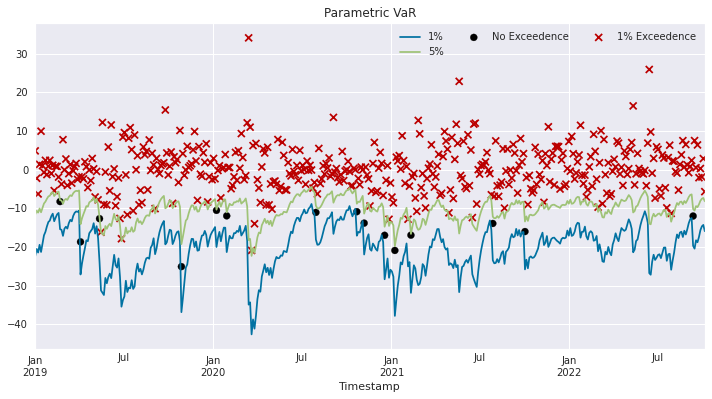

In [233]:
ax = VaR_parametric .plot(legend=False, figsize=(12,6))
xl = ax.set_xlim(VaR_parametric.index[0], VaR_parametric.index[-1])

rets_2019 = bitcoin_data.Return['2019':]
rets_2019.name = 'BTCUSD Return'

c = []
for idx in VaR_parametric.index:
    if rets_2019[idx] > -VaR_parametric.loc[idx, '5%']:
        c.append('#000000')
    elif rets_2019[idx] < -VaR_parametric .loc[idx, '1%']:
        c.append('#BB0000')
    else:
        c.append('#BB00BB')
        
c = np.array(c, dtype='object')

labels = {
    
    '#BB0000': '1% Exceedence',
    '#BB00BB': '5% Exceedence',
    '#000000': 'No Exceedence'
}

markers = {'#BB0000': 'x', '#BB00BB': 's', '#000000': 'o'}

for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2019.index[sel],
        -rets_2019.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color])
    
ax.set_title('Parametric VaR')
ax.legend(frameon=False, ncol=3)

plt.show()

*CONCLUSION*

***Travail fantastique! Faites attention aux points qui sont tombés en dessous du seuil de VaR. Pour une VaR de 5 %, il y a moins de 13 dépassements observés sur 1 an, donc le modèle fait un travail décent.***

####**Calculer la VaR empirique**

+ **Dans cet exercice, vous vous entraînerez à estimer des VaR quotidiennes dynamiques de 5 % avec une approche empirique.**

+ **La différence entre la VaR paramétrique et la VaR empirique réside dans la façon dont les quantiles sont estimés. L'approche paramétrique estime les quantiles à partir d'une hypothèse de distribution supposée, tandis que l'approche empirique estime les quantiles à partir d'une distribution observée des résidus standardisés.**

+ *Vous utiliserez le même modèle GARCH que l'exercice précédent. Les prévisions de moyenne et de variance sont enregistrées respectivement dans mean_forecast et variance_forecast. Les résidus standardisés empiriques ont également été calculés et enregistrés dans std_resid.*

####**Instructions**
+ Calculez 0,05 quantile à partir des résidus standardisés GARCH std_resid.
+ Calculez la VaR en utilisant la moyenne_prévision, la variance_prévision du modèle GARCH et le quantile de l'étape précédente.

5% empirical quantile:  -1.7406276064733972


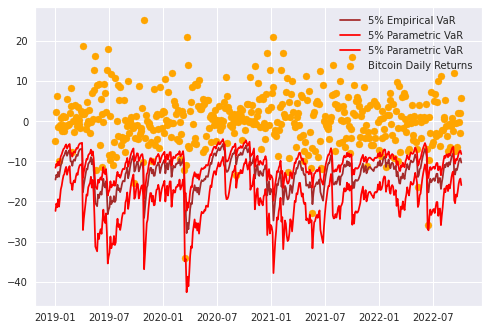

In [234]:
# Obtain the empirical quantile
q_empirical = std_resid.quantile(0.05)
print('5% empirical quantile: ', q_empirical)

# Calculate the VaR
VaR_empirical = mean_forecast.values + np.sqrt(variance_forecast).values * q_empirical
# Save VaR in a DataFrame
VaR_empirical = pd.DataFrame(VaR_empirical, columns = ['5%'], index = variance_forecast.index)

# Plot the VaRs
plt.plot(VaR_empirical, color = 'brown', label = '5% Empirical VaR')
plt.plot(VaR_parametric, color = 'red', label = '5% Parametric VaR')
plt.scatter(variance_forecast.index,bitcoin_data.Return['2019-1-1':], color = 'orange', label = 'Bitcoin Daily Returns' )
plt.legend(loc = 'upper right')
plt.show()

*CONCLUSION*

+ ***Travail fantastique! Dans l'ensemble, les deux VaR sont très proches, mais les VaR empiriques ont des estimations de pertes plus importantes, ce qui implique que les VaR basées sur l'hypothèse théorique de distribution t de Student peuvent sous-estimer les risques de baisse.***

###**Covariance dynamique dans l’optimisation du portefeuille**

####**1. Covariance dynamique dans l’optimisation du portefeuille**

+ ***Dans cette leçon, nous discuterons du concept de covariance et de la façon de calculer la covariance dynamique avec les modèles GARCH. Nous apprendrons également le rôle de la covariance dans la gestion de portefeuille et verrons comment elle peut être utilisée dans l’optimisation du portefeuille.***

####**2. Qu’est-ce que la covariance**

+ **La covariance est un outil statistique utilisé pour déterminer la relation de mouvement entre deux variables**. 

+ **En finance, les variables peuvent être les rendements des prix de différents actifs**. 

+ **Une covariance positive signifie que les prix de deux actifs ont tendance à évoluer dans la même direction**. 

+ Par exemple, lorsque l’économie européenne se redressait, l’euro et la livre sterling se sont appréciés simultanément. 

+ **Une covariance négative signifie que les prix des actifs ont tendance à évoluer dans la direction opposée**. 

+ Par exemple, lorsque l’économie ralentissait, les gens prenaient de l’argent du marché boursier et investissaient dans des actifs plus sûrs comme les bons du Trésor. 

+ Ainsi, les cours des actions étaient en baisse tandis que les prix des titres à revenu fixe augmentaient. 

+ **Comme vous pouvez le voir dans le graphique, si les variables $X$ et $Y$ ont une covariance positive, elles ont tendance à augmenter en valeur ensemble; tandis qu’avec une covariance négative, $X$ a tendance à augmenter en valeur lorsque $Y$ diminue en valeur**.

####**3. Covariance dynamique avec GARCH**


+ **Le modèle GARCH prend en compte la caractéristique variable dans le temps de la volatilité**. 

+ **La covariance dynamique peut être calculée en multipliant le coefficient de corrélation entre les rendements des actifs par leur volatilité à partir des modèles GARCH**.

####**4. Calculer la covariance GARCH en Python**
+ Nous pouvons calculer la covariance GARCH en Python en 4 étapes. 
  + **L’étape 1 consiste à ajuster les modèles GARCH pour chaque série de rendement et à obtenir leurs estimations de volatilité**. 
    + L’exemple de code montre: supposons que nous ayons deux actifs en devises étrangères Euro et dollars canadiens, et que leurs données de séries chronologiques de retour ont été ajustées par deux modèles GARCH: gm_eur et gm_cad. Nous pouvons obtenir directement la volatilité à partir des modèles GARCH. 
  + **L’étape 2 consiste à calculer les résidus normalisés à partir des modèles GARCH ajustés, comme indiqué dans l’exemple de code.**

####**5. Calculer la covariance GARCH en Python (suite)**

+ **L’étape 3 consiste à calculer le coefficient de corrélation comme la corrélation simple entre les résidus standardisés**. 

+ ***Cela peut être fait en utilisant la méthode « corrcoef() » du paquet « numpy ».***

+ **Et la dernière étape consiste à calculer la covariance en multipliant la corrélation et la volatilité GARCH ensemble.**

####**6. Théorie moderne du portefeuille (MPT)**

+ **La théorie moderne du portefeuille ou MPT est une théorie classique de la gestion de portefeuille mise au point par le lauréat du prix Nobel Harry Markwitz dans son article de 1952 « Portfolio Selection »**. 

+ **En résumé, MPT affirme qu’il existe une façon optimale de structurer un portefeuille avec divers actifs pour tirer parti de l’effet de diversification**. 

+ **Le portefeuille optimal peut générer le rendement maximal possible avec un risque minimal**. 

+ **En d’autres termes, un investisseur peut construire un portefeuille de plusieurs actifs qui maximisera les rendements pour un niveau de risque donné. De même, étant donné le niveau souhaité de rendement attendu, un investisseur peut construire un portefeuille avec le risque le plus faible possible.**

####**7. Intuition MPT**
+ Supposons que nous ayons un portefeuille simple de deux actifs et que leurs pondérations soient représentées par W1 et W2. 

+ **La variance du portefeuille peut être calculée par cette formule avec les pondérations des actifs, les variances des rendements des actifs individuels et leur covariance**. 

+ **Remarque Lors du regroupement d’actifs dans un portefeuille, MPT montre que l’inclusion d’actifs présentant une covariance négative peut réduire le risque global du portefeuille**. 

+ **En ce sens, le rendement d’un actif individuel est moins important que la façon dont l’actif se comporte les uns par rapport aux autres, ou dans le contexte de l’ensemble du portefeuille**. 

+ Intuitivement, par exemple, les actions et les obligations ont normalement tendance à évoluer dans des directions opposées. 

+ **En investissant dans les deux, lorsque le marché boursier s’effondre, les prix des obligations ont tendance à augmenter, de sorte que l’ensemble du portefeuille ne souffrira pas autant ou n’atteindra pas le seuil de rentabilité.** 

+ **Enfin, en intégrant les modèles GARCH tout en calculant la covariance, nous pouvons faire des estimations plus réalistes au cours du processus de construction du portefeuille**.

####**8. Entraînons-nous!**
+ Maintenant, c’est votre tour!

###**EXERCICE**

####**Concept de covariance**

+ ***La covariance est utilisée dans divers domaines de la gestion de portefeuille. Avec les modèles GARCH, on peut calculer la covariance dynamique pour incorporer la caractéristique variable dans le temps de la volatilité. Et dans la théorie moderne du portefeuille, la covariance démontre l’avantage de la diversification de la combinaison de différents types d’actifs.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**


+ MPT (Modern Portfolio Theory) stipule qu’avec un certain niveau de rendement attendu, on peut construire un portefeuille optimal avec le minimum de risque possible.

+ ***Lorsque deux prix d’actifs ont tendance à évoluer ensemble dans la même direction, ils ont une covariance négative, et vice versa.***

+ La covariance dynamique peut être calculée en multipliant le coefficient de corrélation entre les rendements des actifs par leur volatilité à partir des modèles GARCH.

*CONCLUSION*

***Travail fantastique! Lorsque deux prix d’actifs ont tendance à évoluer ensemble dans la même direction, leur covariance est positive, pas négative !***

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [333]:
import pandas as pd
sp_data = pd.read_csv("/content/SP500.csv")
sp_data.Date = pd.to_datetime(sp_data.Date)
sp_data.set_index('Date', inplace = True)
sp_data.head()

,Close,Return
Date,,
2010-07-01,1027.37,-0.324048
2010-07-02,1022.58,-0.466239
2010-07-06,1028.06,0.535899
2010-07-07,1060.27,3.133086
2010-07-08,1070.24,0.940327


In [334]:
import pandas as pd
eur_data = pd.read_csv("/content/eur.csv")
eur_data.Date = pd.to_datetime(eur_data.Date)
eur_data.set_index('Date', inplace = True)
eur_data.head()

,Close,Return
Date,,
2009-01-01,1.4045,0.529669
2009-01-02,1.3921,-0.882876
2009-01-05,1.3635,-2.054450
2009-01-06,1.3536,-0.726073
2009-01-07,1.3644,0.797872


In [335]:
import pandas as pd
tes_data = pd.read_csv("/content/Tesla.csv")
tes_data.Date = pd.to_datetime(tes_data.Date)
tes_data.set_index('Date', inplace = True)
tes_data.head()

,Close,Return
Date,,
2010-07-01,21.96,-7.847251
2010-07-02,19.20,-12.568306
2010-07-06,16.11,-16.093750
2010-07-07,15.80,-1.924271
2010-07-08,17.46,10.506329


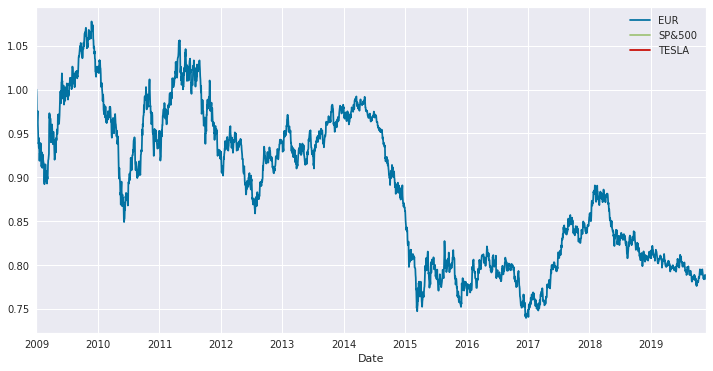

In [336]:
prices = pd.DataFrame({'EUR': eur_data['Close'],
                       'SP&500': sp_data['Close'],
                       'TESLA': tes_data['Close']})

prices.div(prices.iloc[0,:]).plot(figsize=(12, 6))# Normalize Prices 

In [337]:
tes_data['Return'] = np.log(tes_data['Close']).diff().mul(100) # rescale to faciliate optimization
tes_data = tes_data.dropna()

eur_data['Return'] = np.log(eur_data['Close']).diff().mul(100) # rescale to faciliate optimization
eur_data = eur_data.dropna()

sp_data['Return'] = np.log(sp_data['Close']).diff().mul(100) # rescale to faciliate optimization
sp_data = sp_data.dropna()

In [338]:
tes_model = pm.auto_arima(tes_data['Return'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=12114.959, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=12100.777, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=12108.505, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=12108.503, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=12106.153, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.733 seconds


In [ ]:
print(tes_model.summary())

In [ ]:
sp_model = pm.auto_arima(sp_data['Return'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)

In [ ]:
print(sp_model.summary())

In [ ]:
eur_model = pm.auto_arima(eur_data['Return'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)

In [ ]:
print(eur_model.summary())

In [344]:
_arma_sp = sm.tsa.SARIMAX(endog=sp_data['Return'],order=(0, 0, 0))
_sp_model_result = _arma_sp.fit()
egarch_sp = arch_model(_sp_model_result.resid, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
sp_gm_result = egarch_sp.fit(disp = 'off')
print(sp_gm_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -2628.07
Distribution:      Standardized Student's t   AIC:                           5268.13
Method:                  Maximum Likelihood   BIC:                           5302.67
                                              No. Observations:                 2335
Date:                      Sat, Jan 21 2023   Df Residuals:                     2334
Time:                              22:01:09   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  inferred_freq = True


In [ ]:
_arma_eur = sm.tsa.SARIMAX(endog=eur_data['Return'],order=(0, 0, 0))
_eur_model_result = _arma_eur.fit()

egarch_eur = arch_model(_eur_model_result.resid, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
eur_gm_result = egarch_eur.fit(disp = 'off')
print(eur_gm_result.summary())

In [ ]:
_arma_tes = sm.tsa.SARIMAX(endog=tes_data['Return'],order=(0, 0, 0))
_tes_model_result = _arma_tes.fit()

egarch_tes = arch_model(_tes_model_result.resid, p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
tes_gm_result = egarch_tes.fit(disp = 'off')
print(tes_gm_result.summary())

In [347]:
# Step 1: Fit GARCH models and obtain volatility for each return series
vol_sp = sp_gm_result.conditional_volatility
vol_eur = eur_gm_result.conditional_volatility

In [348]:
# Step 2: Compute standardized residuals from the tted GARCH models
resid_sp = sp_gm_result.resid/vol_sp
resid_eur = eur_gm_result.resid/vol_eur

In [350]:
# Step 3: Compute ρ as simple correlation of standardized residuals
corr =resid_sp.corr(resid_eur)

In [351]:
corr

0.1772921724837426

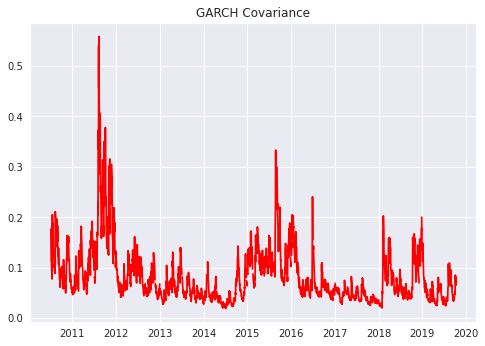

In [352]:
# Step 4: Compute GARCH covariance by multiplying the correlation and volatility.
covariance = corr * vol_sp * vol_eur
# Plot the data
plt.plot(covariance, color = 'red')
plt.title('GARCH Covariance')
plt.show()

####**Calculer la covariance GARCH**

+ *La covariance décrit la relation de mouvement entre deux séries de rendement des prix. La covariance dynamique de rappel peut être calculée par $ρ * σ_1 * σ_2$, où $σ_1, σ_2$ sont les estimations de volatilité des modèles GARCH, et $ρ$ est la simple corrélation entre les résidus standardisés GARCH.*

+ *Dans cet exercice, vous vous entraînerez à calculer la covariance dynamique avec des modèles GARCH*. 

+ Plus précisément, vous utiliserez deux séries chronologiques de données de change : 
  + EUR/USD et USD/CAD (affichées dans le graphique). 
  
+ *Leurs rendements de prix ont été ajustés par deux modèles GARCH, et les estimations de volatilité sont enregistrées dans vol_eur et vol_cad. De plus, leurs résidus standardisés sont enregistrés respectivement dans resid_eur et resid_cad. De plus, le package numpy a été importé en tant que np.*

####**Instructions**
+ Calculer la corrélation entre les résidus standardisés GARCH resid_eur et resid_cad.
+ Calculez la covariance avec la volatilité GARCH vol_eur, vol_cad et la corrélation calculée à l'étape précédente.
+ Tracez la covariance calculée.

Correlation:  0.1772921724837426


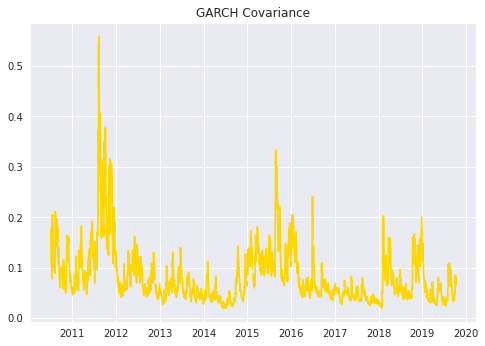

In [353]:
# Calculate correlation
print('Correlation: ', corr)

# Calculate GARCH covariance
covariance =  corr * vol_sp * vol_eur

# Plot the data
plt.plot(covariance, color = 'gold')
plt.title('GARCH Covariance')
plt.show()

####**Calculer la variance dynamique du portefeuille**
+ Dans cet exercice, vous vous exercerez à calculer la variance d'un portefeuille simple à deux actifs avec la covariance dynamique GARCH.

+ La théorie moderne du portefeuille stipule qu'il existe une manière optimale de construire un portefeuille pour tirer parti de l'effet de diversification, de sorte que l'on puisse obtenir un niveau souhaité de rendement attendu avec un risque minimum. Cet effet est particulièrement évident lorsque la covariance entre les rendements des actifs est négative.

+ *Supposons que vous ayez un portefeuille avec seulement deux actifs : les paires de devises EUR/USD et CAD/USD. Leur variance par rapport aux modèles GARCH a été enregistrée dans variance_eur et variance_cad, et leur covariance a été calculée et enregistrée dans covariance. Calculez les variances globales du portefeuille en faisant varier les poids des deux actifs et visualisez leurs différences.*

####**Instructions**
+ Fixez la pondération EUR/USD Wa1 dans le portefeuille a à 0,9 et Wb1 dans le portefeuille b à 0,5.
+ Calculer la variance portvar_a pour le portefeuille a avec variance_eur, variance_cad et covariance ; faites de même pour calculer portvar_b pour le portefeuille b.

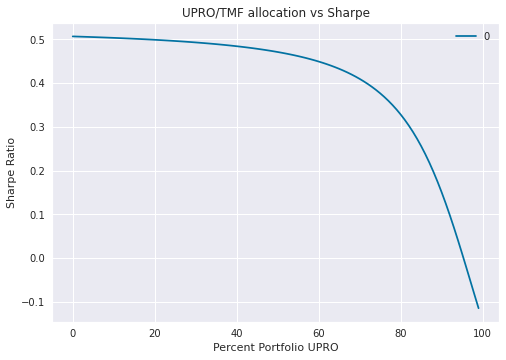

Optimal UPRO Weight = 0
Optimal TNF Weight = 100
Optimal Sharpe Ratio = 0.5067723587814653


In [324]:
data = {}
for perc in range(100):
    daily = (1 - perc / 100) * tes_data["Return"] + (perc / 100) * eur_data["Return"]
    data[perc] = daily.mean() / daily.std() * (252 ** 0.5)
    
sx = pd.Series(data)
s = pd.DataFrame(sx, index=sx.index)
ax = s.plot(title="UPRO/TMF allocation vs Sharpe")
ax.set_ylabel("Sharpe Ratio")
ax.set_xlabel("Percent Portfolio UPRO")
plt.show()

tmf_w = 100 - s.idxmax()[0]
print('Optimal UPRO Weight =', s.idxmax()[0])
print('Optimal TNF Weight =', tmf_w)
print('Optimal Sharpe Ratio =', s.max()[0])

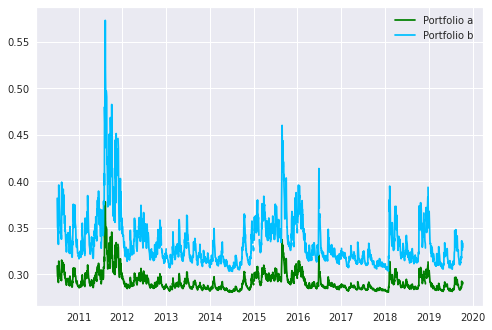

In [357]:
# Define weights
Wa1 = 0.9
Wa2 = 1 - Wa1
Wb1 = 0.5
Wb2 = 1 - Wb1


variance_cad = np.var(sp_data['Return'])
variance_eur = np.var(eur_data['Return'])

# Calculate portfolio variance
portvar_a = Wa1**2 * variance_eur + Wa2**2 * variance_cad + 2*Wa1*Wa2*covariance
portvar_b = Wb1**2 * variance_eur + Wb2**2 * variance_cad + 2*Wb1*Wb2*covariance

# Plot the data
plt.plot(portvar_a, color = 'green', label = 'Portfolio a')
plt.plot(portvar_b, color = 'deepskyblue', label = 'Portfolio b')
plt.legend(loc = 'upper right')
plt.show()


*CONCLUSION*

***Travail formidable! Le portefeuille b est beaucoup moins volatil que le portefeuille a. Même pour un simple portefeuille à deux actifs, la façon dont vous le structurez peut modifier considérablement le profil de risque.***

###**Bêta dynamique dans la gestion de portefeuille**

####**1. Bêta dynamique dans la gestion de portefeuille**

+ **Dans cette leçon, nous apprendrons le bêta en tant que mesure de risque importante utilisée en finance, discuterons de son rôle dans la gestion de portefeuille et de la façon de calculer le bêta dynamique avec les modèles GARCH.**

####**2. Qu’est-ce que la version bêta**

+ En finance, le bêta des actions est une mesure de risque pour une action individuelle par rapport au marché général. 

+ Pour les actions américaines, l’indice S&P 500 est couramment utilisé comme indicateur du marché général. 

+ Le bêta est important car il mesure le risque d’un investissement qui ne peut être réduit par la diversification. 

+ En d’autres termes, il ne mesure pas le risque d’un actif de placement détenu sur une base autonome, mais le montant de risque que l’investissement ajoute au portefeuille.

####**3. Bêta dans la gestion de portefeuille**

+ Dans la gestion de portefeuille, le bêta est une mesure utile du risque d’investissement des actions individuelles par rapport au marché général. 

+ Comme le marché général a un bêta de 1, une action avec un bêta supérieur à 1 indique que l’action est théoriquement plus risquée. 

+ Par exemple, une action avec un bêta de 1 point 2 implique que l’action est environ 20% plus volatile que le marché général. 

+ De même, une action avec un bêta inférieur à 1 implique qu’elle est moins volatile.

####**4. Bêta dans le MEDAF**


+ Stock Beta est nécessaire pour calculer la prime de risque pour une action individuelle. 

+ Plus le bêta est élevé, plus l’action est risquée et donc plus le taux de rendement requis est élevé. 

+ CAPM, qui signifie « Capital Asset Pricing Model », est un modèle classique dans la gestion de portefeuille. 

+ L’équation du MEDAF montre comment déterminer le taux de rendement requis d’un actif de placement. 

+ Utilisez les actions par exemple : 
  + pour calculer le taux de rendement requis, 
  + nous avons besoin du taux sans risque, 
  + du rendement attendu du marché et du bêta de l’action comme intrants de l’équation. 
  
+ Généralement, le taux sans risque est le rendement du Trésor public en tant qu’approximation, le rendement attendu du marché pour les actions est de S & P 500 et le bêta est multiplié par la différence entre le rendement du marché et le taux sans risque, ou prime de marché, pour obtenir le rendement supplémentaire attendu d’une action.

####**5. Bêta dynamique avec GARCH**
+ **Un bêta boursier peut être calculé en multipliant la corrélation entre les rendements des actions et les rendements du marché par la volatilité des actions, puis divisé par la volatilité du marché**. 

+ **La corrélation et la volatilité sont estimées à partir des modèles GARCH, qui tiennent compte de la caractéristique variable dans le temps des risques.**

####**6. Calculer la bêta dynamique en Python**

+ L’exemple de code montre comment calculer le bêta dynamique des actions par rapport au marché général, qui utilise l’indice S&P 500 comme proxy. 

+ Tout d’abord, nous pouvons estimer la corrélation à partir des résidus standardisés GARCH. 

+ Rappelons que les résidus normalisés peuvent être calculés à l’aide du modèle GARCH adapté. 

+ Ensuite, le bêta de l’action peut être calculé en multipliant la corrélation et la volatilité des actions, puis divisé par la volatilité du marché.

####**7. Entraînons-nous!**
+ Maintenant, c’est votre tour. Bonne pratique!

###**EXERCICE**
####**Concept bêta**
+ ***Le bêta est un outil populaire utilisé dans la gestion de portefeuille pour évaluer les risques d’investissement. Un bêta d’action mesure la volatilité d’une action individuelle par rapport au marché général. Le bêta dynamique peut être calculé avec des modèles GARCH pour tenir compte de la qualité variable dans le temps de la volatilité.***

+ *Laquelle des affirmations suivantes est incorrecte ?*

####**Réponds à la question**

+ Le bêta mesure le risque d’un investissement qui ne peut être réduit par la diversification.

+ Une action avec un bêta supérieur à 1 indique qu’elle est plus volatile que le marché général.

+ ***Plus le bêta de l’action est élevé, plus le taux de rendement requis de l’action est faible.***

*CONCLUSION*

***Travail incroyable! Le bêta mesure la volatilité d'une action par rapport au marché général. Plus le bêta est élevé, plus l'action est risquée et, par conséquent, plus le taux de rendement requis est élevé.***

####**Calculer le bêta dynamique des actions**


+ **Supposons qu'Elon Musk soit votre idole et que vous envisagez d'investir dans des actions Tesla. En tant que gestionnaire de portefeuille avisé, vous décidez de faire preuve de diligence raisonnable en vérifiant le bêta de l'action Tesla au fil des ans. Le bêta est une mesure de la volatilité d'une action par rapport au marché, qui peut servir d'indicateur des risques d'investissement.**

+ ***Rappelez-vous que vous avez besoin de la volatilité des actions, de la volatilité du marché (S&P 500 comme proxy) et de leur corrélation de rendement pour calculer le bêta. La corrélation peut être calculée à partir de résidus standardisés.***

+ *La volatilité ajustée du modèle a été préchargée pour Tesla dans teslaGarch_vol et pour le S&P 500 dans spGarch_vol. De plus, les résidus normalisés du modèle sont préchargés respectivement dans teslaGarch_resid et spGarch_resid.*

####**Instructions**
+ Calculez le coefficient de corrélation entre Tesla et le S&P 500 à l'aide des résidus standardisés des modèles GARCH ajustés (teslaGarch_resid, spGarch_resid).

+ Calculez le bêta de l'action Tesla en utilisant la volatilité Tesla (teslaGarch_vol), la volatilité S&P 500 (spGarch_vol) et la corrélation calculée à partir de l'étape précédente.

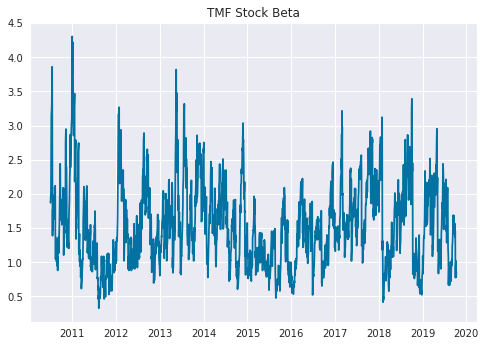

In [355]:
# 1). Compute correlation between S&P500 and stock
resid_stock = tes_gm_result.resid / tes_gm_result.conditional_volatility
resid_sp500 = sp_gm_result.resid / sp_gm_result.conditional_volatility

correlation = np.corrcoef(resid_stock, resid_sp500)[0, 1]

# 2). Compute dynamic Beta for the stock
stock_beta = correlation * (tes_gm_result.conditional_volatility / sp_gm_result.conditional_volatility)
# Plot the Beta
plt.title('TMF Stock Beta')
plt.plot(stock_beta)
plt.show()

In [ ]:
# Compute correlation between SP500 and Tesla
correlation = np.corrcoef(resid_stock, resid_sp500)[0, 1]

# Compute the Beta for Tesla
stock_beta = correlation * (teslaGarch_vol / spGarch_vol)

# Plot the Beta
plt.title('Tesla Stock Beta')
plt.plot(stock_beta)
plt.show()